# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from buffer import ReplayBuffer
from collections import deque
from maddpg import MADDPG
from utilities import transpose_to_tensor

import os

import torch

# define some hyperparameters
batchsize = 512

# amplitude of OU noise
# this slowly decreases to 0
noise_reduction = 0.99999

# keep episodes worth of replay
buffer = ReplayBuffer(int(1e5))
    
# initialize policy and critic
maddpg = MADDPG()
print('Initialize MADDPG()')

Initialize MADDPG()


In [7]:
def marl(n_episodes=10000, noise = 1):
    """Multi-Agent RL bassed on Deep Deterministic Policy Gradient.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """
    avg_scores = []                                           # initialize the avg scores for visualisation purposes
    scores = []                                               # initialize the scores
    scores_window = deque(maxlen=100)                         # keep last 100 scores and remove the previous ones
    
    for episode in range(1, n_episodes+1):                    # play game for n episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                 # get the current state (for each agent)
        states_full = np.reshape(states,(1, -1))              # reshape states to (1,48)
        states = np.expand_dims(np.array(states), axis=0)     # expand the dim of the state matrix to 3d tensor                       
        score = np.zeros(num_agents)                          # initialize the score (for each agent)
        
        while True:
            
            actions = maddpg.act(transpose_to_tensor(states), noise=noise)
            noise *= noise_reduction
            actions_array = torch.stack(actions).detach().numpy()

            # flip the first two indices
            actions_for_env = np.rollaxis(actions_array,1).squeeze()
            
            # adds the tuple to the replay memory to be used for training            
            env_info = env.step(actions_for_env)[brain_name]
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            
            dones = env_info.local_done                        # see if episode finished
            actions_for_env = np.expand_dims(actions_for_env,axis=0)
            
            next_states_full = np.reshape(next_states,(1, -1)) # reshape next_states to (1,48)
            next_states = np.expand_dims(np.array(next_states), axis=0)
            rewards = np.expand_dims(rewards,axis=0)
            dones = np.expand_dims(dones,axis=0)
           
            # add data to buffer 
            transition = (states, states_full, actions_for_env, rewards, next_states, next_states_full, dones)
            buffer.push(transition)
            
            score += env_info.rewards                           # update the score (for each agent)
            states, states_full = next_states, next_states_full # roll over states to next time step
            if np.any(dones):                                   # exit loop if episode finished
                break
        
        # update once the buffer has more samples than the required for training
        if len(buffer) > batchsize:
            for a_i in range(2):
                samples = buffer.sample(batchsize)
                maddpg.update(samples, a_i)
            maddpg.update_targets() #soft update the target network towards the actual networks
            
        scores_window.append(np.max(score))               # save most recent mean score
        scores.append(np.max(score))                      # save most recent mean score
        avg_scores.append(np.mean(scores_window))
        
        print('Score (max over agents) from episode {}: {}'.format(episode, np.max(score)))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)), end="")
        
        if episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window)))
            #saving model
            save_dict_list =[]
            for i in range(2):
                save_dict = {'actor_params' : maddpg.maddpg_agent[i].actor.state_dict(),
                             'actor_optim_params': maddpg.maddpg_agent[i].actor_optimizer.state_dict(),
                             'critic_params' : maddpg.maddpg_agent[i].critic.state_dict(),
                             'critic_optim_params' : maddpg.maddpg_agent[i].critic_optimizer.state_dict()}
                save_dict_list.append(save_dict)

                torch.save(save_dict_list, 
                           os.path.join("model_dir", 'episode-{}.pt'.format(episode)))
            break
    return scores, avg_scores

In [8]:
scores, avg_scores_window = marl(n_episodes=20000, noise = 1)

Score (max over agents) from episode 1: 0.0
Episode 1	Average Score: 0.00Score (max over agents) from episode 2: 0.0
Episode 2	Average Score: 0.00Score (max over agents) from episode 3: 0.0
Episode 3	Average Score: 0.00Score (max over agents) from episode 4: 0.0
Episode 4	Average Score: 0.00Score (max over agents) from episode 5: 0.0
Episode 5	Average Score: 0.00Score (max over agents) from episode 6: 0.0
Episode 6	Average Score: 0.00Score (max over agents) from episode 7: 0.0
Episode 7	Average Score: 0.00Score (max over agents) from episode 8: 0.0
Episode 8	Average Score: 0.00Score (max over agents) from episode 9: 0.0
Episode 9	Average Score: 0.00Score (max over agents) from episode 10: 0.0
Episode 10	Average Score: 0.00Score (max over agents) from episode 11: 0.0
Episode 11	Average Score: 0.00Score (max over agents) from episode 12: 0.0
Episode 12	Average Score: 0.00Score (max over agents) from episode 13: 0.0
Episode 13	Average Score: 0.00Score (max over agents) from episode 14: 0.

Episode 110	Average Score: 0.00Score (max over agents) from episode 111: 0.0
Episode 111	Average Score: 0.00Score (max over agents) from episode 112: 0.0
Episode 112	Average Score: 0.00Score (max over agents) from episode 113: 0.0
Episode 113	Average Score: 0.00Score (max over agents) from episode 114: 0.0
Episode 114	Average Score: 0.00Score (max over agents) from episode 115: 0.0
Episode 115	Average Score: 0.00Score (max over agents) from episode 116: 0.0
Episode 116	Average Score: 0.00Score (max over agents) from episode 117: 0.0
Episode 117	Average Score: 0.00Score (max over agents) from episode 118: 0.0
Episode 118	Average Score: 0.00Score (max over agents) from episode 119: 0.0
Episode 119	Average Score: 0.00Score (max over agents) from episode 120: 0.0
Episode 120	Average Score: 0.00Score (max over agents) from episode 121: 0.0
Episode 121	Average Score: 0.00Score (max over agents) from episode 122: 0.0
Episode 122	Average Score: 0.00Score (max over agents) from episode 123: 0.0

Episode 218	Average Score: 0.00Score (max over agents) from episode 219: 0.0
Episode 219	Average Score: 0.00Score (max over agents) from episode 220: 0.0
Episode 220	Average Score: 0.00Score (max over agents) from episode 221: 0.0
Episode 221	Average Score: 0.00Score (max over agents) from episode 222: 0.0
Episode 222	Average Score: 0.00Score (max over agents) from episode 223: 0.0
Episode 223	Average Score: 0.00Score (max over agents) from episode 224: 0.0
Episode 224	Average Score: 0.00Score (max over agents) from episode 225: 0.0
Episode 225	Average Score: 0.00Score (max over agents) from episode 226: 0.0
Episode 226	Average Score: 0.00Score (max over agents) from episode 227: 0.0
Episode 227	Average Score: 0.00Score (max over agents) from episode 228: 0.0
Episode 228	Average Score: 0.00Score (max over agents) from episode 229: 0.0
Episode 229	Average Score: 0.00Score (max over agents) from episode 230: 0.0
Episode 230	Average Score: 0.00Score (max over agents) from episode 231: 0.0

Episode 324	Average Score: 0.00Score (max over agents) from episode 325: 0.0
Episode 325	Average Score: 0.00Score (max over agents) from episode 326: 0.0
Episode 326	Average Score: 0.00Score (max over agents) from episode 327: 0.0
Episode 327	Average Score: 0.00Score (max over agents) from episode 328: 0.0
Episode 328	Average Score: 0.00Score (max over agents) from episode 329: 0.0
Episode 329	Average Score: 0.00Score (max over agents) from episode 330: 0.0
Episode 330	Average Score: 0.00Score (max over agents) from episode 331: 0.0
Episode 331	Average Score: 0.00Score (max over agents) from episode 332: 0.0
Episode 332	Average Score: 0.00Score (max over agents) from episode 333: 0.0
Episode 333	Average Score: 0.00Score (max over agents) from episode 334: 0.0
Episode 334	Average Score: 0.00Score (max over agents) from episode 335: 0.0
Episode 335	Average Score: 0.00Score (max over agents) from episode 336: 0.0
Episode 336	Average Score: 0.00Score (max over agents) from episode 337: 0.0

Episode 432	Average Score: 0.00Score (max over agents) from episode 433: 0.0
Episode 433	Average Score: 0.00Score (max over agents) from episode 434: 0.0
Episode 434	Average Score: 0.00Score (max over agents) from episode 435: 0.0
Episode 435	Average Score: 0.00Score (max over agents) from episode 436: 0.0
Episode 436	Average Score: 0.00Score (max over agents) from episode 437: 0.0
Episode 437	Average Score: 0.00Score (max over agents) from episode 438: 0.0
Episode 438	Average Score: 0.00Score (max over agents) from episode 439: 0.0
Episode 439	Average Score: 0.00Score (max over agents) from episode 440: 0.0
Episode 440	Average Score: 0.00Score (max over agents) from episode 441: 0.0
Episode 441	Average Score: 0.00Score (max over agents) from episode 442: 0.0
Episode 442	Average Score: 0.00Score (max over agents) from episode 443: 0.0
Episode 443	Average Score: 0.00Score (max over agents) from episode 444: 0.0
Episode 444	Average Score: 0.00Score (max over agents) from episode 445: 0.0

Episode 539	Average Score: 0.00Score (max over agents) from episode 540: 0.0
Episode 540	Average Score: 0.00Score (max over agents) from episode 541: 0.0
Episode 541	Average Score: 0.00Score (max over agents) from episode 542: 0.0
Episode 542	Average Score: 0.00Score (max over agents) from episode 543: 0.0
Episode 543	Average Score: 0.00Score (max over agents) from episode 544: 0.0
Episode 544	Average Score: 0.00Score (max over agents) from episode 545: 0.0
Episode 545	Average Score: 0.00Score (max over agents) from episode 546: 0.0
Episode 546	Average Score: 0.00Score (max over agents) from episode 547: 0.0
Episode 547	Average Score: 0.00Score (max over agents) from episode 548: 0.0
Episode 548	Average Score: 0.00Score (max over agents) from episode 549: 0.0
Episode 549	Average Score: 0.00Score (max over agents) from episode 550: 0.0
Episode 550	Average Score: 0.00Score (max over agents) from episode 551: 0.0
Episode 551	Average Score: 0.00Score (max over agents) from episode 552: 0.0

Episode 647	Average Score: 0.00Score (max over agents) from episode 648: 0.0
Episode 648	Average Score: 0.00Score (max over agents) from episode 649: 0.0
Episode 649	Average Score: 0.00Score (max over agents) from episode 650: 0.0
Episode 650	Average Score: 0.00Score (max over agents) from episode 651: 0.0
Episode 651	Average Score: 0.00Score (max over agents) from episode 652: 0.0
Episode 652	Average Score: 0.00Score (max over agents) from episode 653: 0.0
Episode 653	Average Score: 0.00Score (max over agents) from episode 654: 0.0
Episode 654	Average Score: 0.00Score (max over agents) from episode 655: 0.0
Episode 655	Average Score: 0.00Score (max over agents) from episode 656: 0.0
Episode 656	Average Score: 0.00Score (max over agents) from episode 657: 0.0
Episode 657	Average Score: 0.00Score (max over agents) from episode 658: 0.0
Episode 658	Average Score: 0.00Score (max over agents) from episode 659: 0.0
Episode 659	Average Score: 0.00Score (max over agents) from episode 660: 0.0

Episode 755	Average Score: 0.00Score (max over agents) from episode 756: 0.0
Episode 756	Average Score: 0.00Score (max over agents) from episode 757: 0.0
Episode 757	Average Score: 0.00Score (max over agents) from episode 758: 0.0
Episode 758	Average Score: 0.00Score (max over agents) from episode 759: 0.0
Episode 759	Average Score: 0.00Score (max over agents) from episode 760: 0.0
Episode 760	Average Score: 0.00Score (max over agents) from episode 761: 0.0
Episode 761	Average Score: 0.00Score (max over agents) from episode 762: 0.0
Episode 762	Average Score: 0.00Score (max over agents) from episode 763: 0.0
Episode 763	Average Score: 0.00Score (max over agents) from episode 764: 0.0
Episode 764	Average Score: 0.00Score (max over agents) from episode 765: 0.0
Episode 765	Average Score: 0.00Score (max over agents) from episode 766: 0.0
Episode 766	Average Score: 0.00Score (max over agents) from episode 767: 0.0
Episode 767	Average Score: 0.00Score (max over agents) from episode 768: 0.0

Episode 863	Average Score: 0.00Score (max over agents) from episode 864: 0.0
Episode 864	Average Score: 0.00Score (max over agents) from episode 865: 0.0
Episode 865	Average Score: 0.00Score (max over agents) from episode 866: 0.0
Episode 866	Average Score: 0.00Score (max over agents) from episode 867: 0.0
Episode 867	Average Score: 0.00Score (max over agents) from episode 868: 0.0
Episode 868	Average Score: 0.00Score (max over agents) from episode 869: 0.0
Episode 869	Average Score: 0.00Score (max over agents) from episode 870: 0.0
Episode 870	Average Score: 0.00Score (max over agents) from episode 871: 0.0
Episode 871	Average Score: 0.00Score (max over agents) from episode 872: 0.0
Episode 872	Average Score: 0.00Score (max over agents) from episode 873: 0.0
Episode 873	Average Score: 0.00Score (max over agents) from episode 874: 0.0
Episode 874	Average Score: 0.00Score (max over agents) from episode 875: 0.0
Episode 875	Average Score: 0.00Score (max over agents) from episode 876: 0.0

Episode 971	Average Score: 0.00Score (max over agents) from episode 972: 0.0
Episode 972	Average Score: 0.00Score (max over agents) from episode 973: 0.0
Episode 973	Average Score: 0.00Score (max over agents) from episode 974: 0.0
Episode 974	Average Score: 0.00Score (max over agents) from episode 975: 0.0
Episode 975	Average Score: 0.00Score (max over agents) from episode 976: 0.0
Episode 976	Average Score: 0.00Score (max over agents) from episode 977: 0.0
Episode 977	Average Score: 0.00Score (max over agents) from episode 978: 0.0
Episode 978	Average Score: 0.00Score (max over agents) from episode 979: 0.0
Episode 979	Average Score: 0.00Score (max over agents) from episode 980: 0.0
Episode 980	Average Score: 0.00Score (max over agents) from episode 981: 0.0
Episode 981	Average Score: 0.00Score (max over agents) from episode 982: 0.0
Episode 982	Average Score: 0.00Score (max over agents) from episode 983: 0.0
Episode 983	Average Score: 0.00Score (max over agents) from episode 984: 0.0

Episode 1079	Average Score: 0.00Score (max over agents) from episode 1080: 0.0
Episode 1080	Average Score: 0.00Score (max over agents) from episode 1081: 0.0
Episode 1081	Average Score: 0.00Score (max over agents) from episode 1082: 0.0
Episode 1082	Average Score: 0.00Score (max over agents) from episode 1083: 0.0
Episode 1083	Average Score: 0.00Score (max over agents) from episode 1084: 0.0
Episode 1084	Average Score: 0.00Score (max over agents) from episode 1085: 0.0
Episode 1085	Average Score: 0.00Score (max over agents) from episode 1086: 0.0
Episode 1086	Average Score: 0.00Score (max over agents) from episode 1087: 0.0
Episode 1087	Average Score: 0.00Score (max over agents) from episode 1088: 0.0
Episode 1088	Average Score: 0.00Score (max over agents) from episode 1089: 0.0
Episode 1089	Average Score: 0.00Score (max over agents) from episode 1090: 0.0
Episode 1090	Average Score: 0.00Score (max over agents) from episode 1091: 0.0
Episode 1091	Average Score: 0.00Score (max over agen

Episode 1183	Average Score: 0.00Score (max over agents) from episode 1184: 0.0
Episode 1184	Average Score: 0.00Score (max over agents) from episode 1185: 0.0
Episode 1185	Average Score: 0.00Score (max over agents) from episode 1186: 0.0
Episode 1186	Average Score: 0.00Score (max over agents) from episode 1187: 0.0
Episode 1187	Average Score: 0.00Score (max over agents) from episode 1188: 0.0
Episode 1188	Average Score: 0.00Score (max over agents) from episode 1189: 0.0
Episode 1189	Average Score: 0.00Score (max over agents) from episode 1190: 0.0
Episode 1190	Average Score: 0.00Score (max over agents) from episode 1191: 0.0
Episode 1191	Average Score: 0.00Score (max over agents) from episode 1192: 0.0
Episode 1192	Average Score: 0.00Score (max over agents) from episode 1193: 0.0
Episode 1193	Average Score: 0.00Score (max over agents) from episode 1194: 0.0
Episode 1194	Average Score: 0.00Score (max over agents) from episode 1195: 0.0
Episode 1195	Average Score: 0.00Score (max over agen

Episode 1288	Average Score: 0.00Score (max over agents) from episode 1289: 0.0
Episode 1289	Average Score: 0.00Score (max over agents) from episode 1290: 0.0
Episode 1290	Average Score: 0.00Score (max over agents) from episode 1291: 0.0
Episode 1291	Average Score: 0.00Score (max over agents) from episode 1292: 0.0
Episode 1292	Average Score: 0.00Score (max over agents) from episode 1293: 0.0
Episode 1293	Average Score: 0.00Score (max over agents) from episode 1294: 0.0
Episode 1294	Average Score: 0.00Score (max over agents) from episode 1295: 0.0
Episode 1295	Average Score: 0.00Score (max over agents) from episode 1296: 0.0
Episode 1296	Average Score: 0.00Score (max over agents) from episode 1297: 0.0
Episode 1297	Average Score: 0.00Score (max over agents) from episode 1298: 0.0
Episode 1298	Average Score: 0.00Score (max over agents) from episode 1299: 0.0
Episode 1299	Average Score: 0.00Score (max over agents) from episode 1300: 0.0
Episode 1300	Average Score: 0.00
Score (max over age

Episode 1392	Average Score: 0.00Score (max over agents) from episode 1393: 0.0
Episode 1393	Average Score: 0.00Score (max over agents) from episode 1394: 0.0
Episode 1394	Average Score: 0.00Score (max over agents) from episode 1395: 0.0
Episode 1395	Average Score: 0.00Score (max over agents) from episode 1396: 0.0
Episode 1396	Average Score: 0.00Score (max over agents) from episode 1397: 0.0
Episode 1397	Average Score: 0.00Score (max over agents) from episode 1398: 0.0
Episode 1398	Average Score: 0.00Score (max over agents) from episode 1399: 0.0
Episode 1399	Average Score: 0.00Score (max over agents) from episode 1400: 0.0
Episode 1400	Average Score: 0.00
Score (max over agents) from episode 1401: 0.0
Episode 1401	Average Score: 0.00Score (max over agents) from episode 1402: 0.0
Episode 1402	Average Score: 0.00Score (max over agents) from episode 1403: 0.0
Episode 1403	Average Score: 0.00Score (max over agents) from episode 1404: 0.0
Episode 1404	Average Score: 0.00Score (max over age

Episode 1497	Average Score: 0.00Score (max over agents) from episode 1498: 0.0
Episode 1498	Average Score: 0.00Score (max over agents) from episode 1499: 0.0
Episode 1499	Average Score: 0.00Score (max over agents) from episode 1500: 0.0
Episode 1500	Average Score: 0.00
Score (max over agents) from episode 1501: 0.0
Episode 1501	Average Score: 0.00Score (max over agents) from episode 1502: 0.0
Episode 1502	Average Score: 0.00Score (max over agents) from episode 1503: 0.0
Episode 1503	Average Score: 0.00Score (max over agents) from episode 1504: 0.0
Episode 1504	Average Score: 0.00Score (max over agents) from episode 1505: 0.0
Episode 1505	Average Score: 0.00Score (max over agents) from episode 1506: 0.0
Episode 1506	Average Score: 0.00Score (max over agents) from episode 1507: 0.0
Episode 1507	Average Score: 0.00Score (max over agents) from episode 1508: 0.0
Episode 1508	Average Score: 0.00Score (max over agents) from episode 1509: 0.0
Episode 1509	Average Score: 0.00Score (max over age

Episode 1601	Average Score: 0.00Score (max over agents) from episode 1602: 0.0
Episode 1602	Average Score: 0.00Score (max over agents) from episode 1603: 0.0
Episode 1603	Average Score: 0.00Score (max over agents) from episode 1604: 0.0
Episode 1604	Average Score: 0.00Score (max over agents) from episode 1605: 0.0
Episode 1605	Average Score: 0.00Score (max over agents) from episode 1606: 0.0
Episode 1606	Average Score: 0.00Score (max over agents) from episode 1607: 0.0
Episode 1607	Average Score: 0.00Score (max over agents) from episode 1608: 0.0
Episode 1608	Average Score: 0.00Score (max over agents) from episode 1609: 0.0
Episode 1609	Average Score: 0.00Score (max over agents) from episode 1610: 0.0
Episode 1610	Average Score: 0.00Score (max over agents) from episode 1611: 0.0
Episode 1611	Average Score: 0.00Score (max over agents) from episode 1612: 0.0
Episode 1612	Average Score: 0.00Score (max over agents) from episode 1613: 0.0
Episode 1613	Average Score: 0.00Score (max over agen

Episode 1706	Average Score: 0.00Score (max over agents) from episode 1707: 0.0
Episode 1707	Average Score: 0.00Score (max over agents) from episode 1708: 0.0
Episode 1708	Average Score: 0.00Score (max over agents) from episode 1709: 0.0
Episode 1709	Average Score: 0.00Score (max over agents) from episode 1710: 0.0
Episode 1710	Average Score: 0.00Score (max over agents) from episode 1711: 0.0
Episode 1711	Average Score: 0.00Score (max over agents) from episode 1712: 0.0
Episode 1712	Average Score: 0.00Score (max over agents) from episode 1713: 0.0
Episode 1713	Average Score: 0.00Score (max over agents) from episode 1714: 0.0
Episode 1714	Average Score: 0.00Score (max over agents) from episode 1715: 0.0
Episode 1715	Average Score: 0.00Score (max over agents) from episode 1716: 0.0
Episode 1716	Average Score: 0.00Score (max over agents) from episode 1717: 0.0
Episode 1717	Average Score: 0.00Score (max over agents) from episode 1718: 0.0
Episode 1718	Average Score: 0.00Score (max over agen

Episode 1812	Average Score: 0.00Score (max over agents) from episode 1813: 0.0
Episode 1813	Average Score: 0.00Score (max over agents) from episode 1814: 0.0
Episode 1814	Average Score: 0.00Score (max over agents) from episode 1815: 0.0
Episode 1815	Average Score: 0.00Score (max over agents) from episode 1816: 0.0
Episode 1816	Average Score: 0.00Score (max over agents) from episode 1817: 0.0
Episode 1817	Average Score: 0.00Score (max over agents) from episode 1818: 0.0
Episode 1818	Average Score: 0.00Score (max over agents) from episode 1819: 0.0
Episode 1819	Average Score: 0.00Score (max over agents) from episode 1820: 0.0
Episode 1820	Average Score: 0.00Score (max over agents) from episode 1821: 0.0
Episode 1821	Average Score: 0.00Score (max over agents) from episode 1822: 0.0
Episode 1822	Average Score: 0.00Score (max over agents) from episode 1823: 0.0
Episode 1823	Average Score: 0.00Score (max over agents) from episode 1824: 0.0
Episode 1824	Average Score: 0.00Score (max over agen

Episode 1919	Average Score: 0.00Score (max over agents) from episode 1920: 0.0
Episode 1920	Average Score: 0.00Score (max over agents) from episode 1921: 0.0
Episode 1921	Average Score: 0.00Score (max over agents) from episode 1922: 0.0
Episode 1922	Average Score: 0.00Score (max over agents) from episode 1923: 0.0
Episode 1923	Average Score: 0.00Score (max over agents) from episode 1924: 0.0
Episode 1924	Average Score: 0.00Score (max over agents) from episode 1925: 0.0
Episode 1925	Average Score: 0.00Score (max over agents) from episode 1926: 0.0
Episode 1926	Average Score: 0.00Score (max over agents) from episode 1927: 0.0
Episode 1927	Average Score: 0.00Score (max over agents) from episode 1928: 0.0
Episode 1928	Average Score: 0.00Score (max over agents) from episode 1929: 0.0
Episode 1929	Average Score: 0.00Score (max over agents) from episode 1930: 0.0
Episode 1930	Average Score: 0.00Score (max over agents) from episode 1931: 0.0
Episode 1931	Average Score: 0.00Score (max over agen

Episode 2026	Average Score: 0.00Score (max over agents) from episode 2027: 0.0
Episode 2027	Average Score: 0.00Score (max over agents) from episode 2028: 0.0
Episode 2028	Average Score: 0.00Score (max over agents) from episode 2029: 0.0
Episode 2029	Average Score: 0.00Score (max over agents) from episode 2030: 0.0
Episode 2030	Average Score: 0.00Score (max over agents) from episode 2031: 0.0
Episode 2031	Average Score: 0.00Score (max over agents) from episode 2032: 0.0
Episode 2032	Average Score: 0.00Score (max over agents) from episode 2033: 0.0
Episode 2033	Average Score: 0.00Score (max over agents) from episode 2034: 0.0
Episode 2034	Average Score: 0.00Score (max over agents) from episode 2035: 0.0
Episode 2035	Average Score: 0.00Score (max over agents) from episode 2036: 0.0
Episode 2036	Average Score: 0.00Score (max over agents) from episode 2037: 0.0
Episode 2037	Average Score: 0.00Score (max over agents) from episode 2038: 0.0
Episode 2038	Average Score: 0.00Score (max over agen

Episode 2133	Average Score: 0.00Score (max over agents) from episode 2134: 0.0
Episode 2134	Average Score: 0.00Score (max over agents) from episode 2135: 0.0
Episode 2135	Average Score: 0.00Score (max over agents) from episode 2136: 0.0
Episode 2136	Average Score: 0.00Score (max over agents) from episode 2137: 0.0
Episode 2137	Average Score: 0.00Score (max over agents) from episode 2138: 0.0
Episode 2138	Average Score: 0.00Score (max over agents) from episode 2139: 0.0
Episode 2139	Average Score: 0.00Score (max over agents) from episode 2140: 0.0
Episode 2140	Average Score: 0.00Score (max over agents) from episode 2141: 0.0
Episode 2141	Average Score: 0.00Score (max over agents) from episode 2142: 0.0
Episode 2142	Average Score: 0.00Score (max over agents) from episode 2143: 0.0
Episode 2143	Average Score: 0.00Score (max over agents) from episode 2144: 0.0
Episode 2144	Average Score: 0.00Score (max over agents) from episode 2145: 0.0
Episode 2145	Average Score: 0.00Score (max over agen

Episode 2240	Average Score: 0.00Score (max over agents) from episode 2241: 0.0
Episode 2241	Average Score: 0.00Score (max over agents) from episode 2242: 0.0
Episode 2242	Average Score: 0.00Score (max over agents) from episode 2243: 0.0
Episode 2243	Average Score: 0.00Score (max over agents) from episode 2244: 0.0
Episode 2244	Average Score: 0.00Score (max over agents) from episode 2245: 0.0
Episode 2245	Average Score: 0.00Score (max over agents) from episode 2246: 0.0
Episode 2246	Average Score: 0.00Score (max over agents) from episode 2247: 0.0
Episode 2247	Average Score: 0.00Score (max over agents) from episode 2248: 0.0
Episode 2248	Average Score: 0.00Score (max over agents) from episode 2249: 0.0
Episode 2249	Average Score: 0.00Score (max over agents) from episode 2250: 0.0
Episode 2250	Average Score: 0.00Score (max over agents) from episode 2251: 0.0
Episode 2251	Average Score: 0.00Score (max over agents) from episode 2252: 0.0
Episode 2252	Average Score: 0.00Score (max over agen

Episode 2347	Average Score: 0.00Score (max over agents) from episode 2348: 0.0
Episode 2348	Average Score: 0.00Score (max over agents) from episode 2349: 0.0
Episode 2349	Average Score: 0.00Score (max over agents) from episode 2350: 0.0
Episode 2350	Average Score: 0.00Score (max over agents) from episode 2351: 0.0
Episode 2351	Average Score: 0.00Score (max over agents) from episode 2352: 0.0
Episode 2352	Average Score: 0.00Score (max over agents) from episode 2353: 0.0
Episode 2353	Average Score: 0.00Score (max over agents) from episode 2354: 0.0
Episode 2354	Average Score: 0.00Score (max over agents) from episode 2355: 0.0
Episode 2355	Average Score: 0.00Score (max over agents) from episode 2356: 0.0
Episode 2356	Average Score: 0.00Score (max over agents) from episode 2357: 0.0
Episode 2357	Average Score: 0.00Score (max over agents) from episode 2358: 0.0
Episode 2358	Average Score: 0.00Score (max over agents) from episode 2359: 0.0
Episode 2359	Average Score: 0.00Score (max over agen

Episode 2453	Average Score: 0.00Score (max over agents) from episode 2454: 0.0
Episode 2454	Average Score: 0.00Score (max over agents) from episode 2455: 0.0
Episode 2455	Average Score: 0.00Score (max over agents) from episode 2456: 0.0
Episode 2456	Average Score: 0.00Score (max over agents) from episode 2457: 0.0
Episode 2457	Average Score: 0.00Score (max over agents) from episode 2458: 0.0
Episode 2458	Average Score: 0.00Score (max over agents) from episode 2459: 0.0
Episode 2459	Average Score: 0.00Score (max over agents) from episode 2460: 0.0
Episode 2460	Average Score: 0.00Score (max over agents) from episode 2461: 0.0
Episode 2461	Average Score: 0.00Score (max over agents) from episode 2462: 0.0
Episode 2462	Average Score: 0.00Score (max over agents) from episode 2463: 0.0
Episode 2463	Average Score: 0.00Score (max over agents) from episode 2464: 0.0
Episode 2464	Average Score: 0.00Score (max over agents) from episode 2465: 0.0
Episode 2465	Average Score: 0.00Score (max over agen

Episode 2557	Average Score: 0.00Score (max over agents) from episode 2558: 0.0
Episode 2558	Average Score: 0.00Score (max over agents) from episode 2559: 0.0
Episode 2559	Average Score: 0.00Score (max over agents) from episode 2560: 0.0
Episode 2560	Average Score: 0.00Score (max over agents) from episode 2561: 0.0
Episode 2561	Average Score: 0.00Score (max over agents) from episode 2562: 0.0
Episode 2562	Average Score: 0.00Score (max over agents) from episode 2563: 0.0
Episode 2563	Average Score: 0.00Score (max over agents) from episode 2564: 0.0
Episode 2564	Average Score: 0.00Score (max over agents) from episode 2565: 0.0
Episode 2565	Average Score: 0.00Score (max over agents) from episode 2566: 0.0
Episode 2566	Average Score: 0.00Score (max over agents) from episode 2567: 0.0
Episode 2567	Average Score: 0.00Score (max over agents) from episode 2568: 0.0
Episode 2568	Average Score: 0.00Score (max over agents) from episode 2569: 0.0
Episode 2569	Average Score: 0.00Score (max over agen

Episode 2658	Average Score: 0.02Score (max over agents) from episode 2659: 0.0
Episode 2659	Average Score: 0.02Score (max over agents) from episode 2660: 0.0
Episode 2660	Average Score: 0.02Score (max over agents) from episode 2661: 0.0
Episode 2661	Average Score: 0.02Score (max over agents) from episode 2662: 0.0
Episode 2662	Average Score: 0.02Score (max over agents) from episode 2663: 0.0
Episode 2663	Average Score: 0.02Score (max over agents) from episode 2664: 0.10000000149011612
Episode 2664	Average Score: 0.02Score (max over agents) from episode 2665: 0.0
Episode 2665	Average Score: 0.02Score (max over agents) from episode 2666: 0.0
Episode 2666	Average Score: 0.02Score (max over agents) from episode 2667: 0.0
Episode 2667	Average Score: 0.02Score (max over agents) from episode 2668: 0.0
Episode 2668	Average Score: 0.02Score (max over agents) from episode 2669: 0.0
Episode 2669	Average Score: 0.02Score (max over agents) from episode 2670: 0.0
Episode 2670	Average Score: 0.02Scor

Episode 2760	Average Score: 0.01Score (max over agents) from episode 2761: 0.0
Episode 2761	Average Score: 0.01Score (max over agents) from episode 2762: 0.10000000149011612
Episode 2762	Average Score: 0.01Score (max over agents) from episode 2763: 0.0
Episode 2763	Average Score: 0.01Score (max over agents) from episode 2764: 0.0
Episode 2764	Average Score: 0.01Score (max over agents) from episode 2765: 0.0
Episode 2765	Average Score: 0.01Score (max over agents) from episode 2766: 0.0
Episode 2766	Average Score: 0.01Score (max over agents) from episode 2767: 0.0
Episode 2767	Average Score: 0.01Score (max over agents) from episode 2768: 0.0
Episode 2768	Average Score: 0.01Score (max over agents) from episode 2769: 0.0
Episode 2769	Average Score: 0.01Score (max over agents) from episode 2770: 0.10000000149011612
Episode 2770	Average Score: 0.01Score (max over agents) from episode 2771: 0.0
Episode 2771	Average Score: 0.01Score (max over agents) from episode 2772: 0.10000000149011612
Epis

Episode 2862	Average Score: 0.02Score (max over agents) from episode 2863: 0.10000000149011612
Episode 2863	Average Score: 0.02Score (max over agents) from episode 2864: 0.0
Episode 2864	Average Score: 0.02Score (max over agents) from episode 2865: 0.0
Episode 2865	Average Score: 0.02Score (max over agents) from episode 2866: 0.0
Episode 2866	Average Score: 0.02Score (max over agents) from episode 2867: 0.10000000149011612
Episode 2867	Average Score: 0.02Score (max over agents) from episode 2868: 0.0
Episode 2868	Average Score: 0.02Score (max over agents) from episode 2869: 0.0
Episode 2869	Average Score: 0.02Score (max over agents) from episode 2870: 0.10000000149011612
Episode 2870	Average Score: 0.02Score (max over agents) from episode 2871: 0.0
Episode 2871	Average Score: 0.02Score (max over agents) from episode 2872: 0.0
Episode 2872	Average Score: 0.02Score (max over agents) from episode 2873: 0.0
Episode 2873	Average Score: 0.02Score (max over agents) from episode 2874: 0.100000

Episode 2962	Average Score: 0.02Score (max over agents) from episode 2963: 0.0
Episode 2963	Average Score: 0.02Score (max over agents) from episode 2964: 0.0
Episode 2964	Average Score: 0.02Score (max over agents) from episode 2965: 0.0
Episode 2965	Average Score: 0.02Score (max over agents) from episode 2966: 0.0
Episode 2966	Average Score: 0.02Score (max over agents) from episode 2967: 0.0
Episode 2967	Average Score: 0.02Score (max over agents) from episode 2968: 0.0
Episode 2968	Average Score: 0.02Score (max over agents) from episode 2969: 0.0
Episode 2969	Average Score: 0.02Score (max over agents) from episode 2970: 0.0
Episode 2970	Average Score: 0.02Score (max over agents) from episode 2971: 0.0
Episode 2971	Average Score: 0.02Score (max over agents) from episode 2972: 0.0
Episode 2972	Average Score: 0.02Score (max over agents) from episode 2973: 0.0
Episode 2973	Average Score: 0.02Score (max over agents) from episode 2974: 0.0
Episode 2974	Average Score: 0.02Score (max over agen

Episode 3066	Average Score: 0.00Score (max over agents) from episode 3067: 0.0
Episode 3067	Average Score: 0.00Score (max over agents) from episode 3068: 0.0
Episode 3068	Average Score: 0.00Score (max over agents) from episode 3069: 0.0
Episode 3069	Average Score: 0.00Score (max over agents) from episode 3070: 0.0
Episode 3070	Average Score: 0.00Score (max over agents) from episode 3071: 0.10000000149011612
Episode 3071	Average Score: 0.00Score (max over agents) from episode 3072: 0.0
Episode 3072	Average Score: 0.00Score (max over agents) from episode 3073: 0.0
Episode 3073	Average Score: 0.00Score (max over agents) from episode 3074: 0.0
Episode 3074	Average Score: 0.00Score (max over agents) from episode 3075: 0.0
Episode 3075	Average Score: 0.00Score (max over agents) from episode 3076: 0.0
Episode 3076	Average Score: 0.00Score (max over agents) from episode 3077: 0.0
Episode 3077	Average Score: 0.00Score (max over agents) from episode 3078: 0.0
Episode 3078	Average Score: 0.00Scor

Episode 3169	Average Score: 0.00Score (max over agents) from episode 3170: 0.0
Episode 3170	Average Score: 0.00Score (max over agents) from episode 3171: 0.0
Episode 3171	Average Score: 0.00Score (max over agents) from episode 3172: 0.0
Episode 3172	Average Score: 0.00Score (max over agents) from episode 3173: 0.0
Episode 3173	Average Score: 0.00Score (max over agents) from episode 3174: 0.0
Episode 3174	Average Score: 0.00Score (max over agents) from episode 3175: 0.0
Episode 3175	Average Score: 0.00Score (max over agents) from episode 3176: 0.0
Episode 3176	Average Score: 0.00Score (max over agents) from episode 3177: 0.0
Episode 3177	Average Score: 0.00Score (max over agents) from episode 3178: 0.0
Episode 3178	Average Score: 0.00Score (max over agents) from episode 3179: 0.0
Episode 3179	Average Score: 0.00Score (max over agents) from episode 3180: 0.0
Episode 3180	Average Score: 0.00Score (max over agents) from episode 3181: 0.0
Episode 3181	Average Score: 0.00Score (max over agen

Episode 3273	Average Score: 0.01Score (max over agents) from episode 3274: 0.10000000149011612
Episode 3274	Average Score: 0.01Score (max over agents) from episode 3275: 0.0
Episode 3275	Average Score: 0.01Score (max over agents) from episode 3276: 0.0
Episode 3276	Average Score: 0.01Score (max over agents) from episode 3277: 0.0
Episode 3277	Average Score: 0.01Score (max over agents) from episode 3278: 0.0
Episode 3278	Average Score: 0.01Score (max over agents) from episode 3279: 0.0
Episode 3279	Average Score: 0.01Score (max over agents) from episode 3280: 0.0
Episode 3280	Average Score: 0.01Score (max over agents) from episode 3281: 0.0
Episode 3281	Average Score: 0.01Score (max over agents) from episode 3282: 0.0
Episode 3282	Average Score: 0.01Score (max over agents) from episode 3283: 0.0
Episode 3283	Average Score: 0.01Score (max over agents) from episode 3284: 0.0
Episode 3284	Average Score: 0.01Score (max over agents) from episode 3285: 0.0
Episode 3285	Average Score: 0.01Scor

Episode 3376	Average Score: 0.01Score (max over agents) from episode 3377: 0.10000000149011612
Episode 3377	Average Score: 0.01Score (max over agents) from episode 3378: 0.0
Episode 3378	Average Score: 0.01Score (max over agents) from episode 3379: 0.0
Episode 3379	Average Score: 0.01Score (max over agents) from episode 3380: 0.10000000149011612
Episode 3380	Average Score: 0.01Score (max over agents) from episode 3381: 0.10000000149011612
Episode 3381	Average Score: 0.01Score (max over agents) from episode 3382: 0.0
Episode 3382	Average Score: 0.01Score (max over agents) from episode 3383: 0.0
Episode 3383	Average Score: 0.01Score (max over agents) from episode 3384: 0.0
Episode 3384	Average Score: 0.01Score (max over agents) from episode 3385: 0.10000000149011612
Episode 3385	Average Score: 0.02Score (max over agents) from episode 3386: 0.10000000149011612
Episode 3386	Average Score: 0.02Score (max over agents) from episode 3387: 0.0
Episode 3387	Average Score: 0.02Score (max over age

Episode 3472	Average Score: 0.04Score (max over agents) from episode 3473: 0.10000000149011612
Episode 3473	Average Score: 0.04Score (max over agents) from episode 3474: 0.10000000149011612
Episode 3474	Average Score: 0.04Score (max over agents) from episode 3475: 0.10000000149011612
Episode 3475	Average Score: 0.04Score (max over agents) from episode 3476: 0.0
Episode 3476	Average Score: 0.04Score (max over agents) from episode 3477: 0.10000000149011612
Episode 3477	Average Score: 0.04Score (max over agents) from episode 3478: 0.10000000149011612
Episode 3478	Average Score: 0.04Score (max over agents) from episode 3479: 0.10000000149011612
Episode 3479	Average Score: 0.05Score (max over agents) from episode 3480: 0.0
Episode 3480	Average Score: 0.04Score (max over agents) from episode 3481: 0.0
Episode 3481	Average Score: 0.04Score (max over agents) from episode 3482: 0.0
Episode 3482	Average Score: 0.04Score (max over agents) from episode 3483: 0.10000000149011612
Episode 3483	Averag

Episode 3574	Average Score: 0.02Score (max over agents) from episode 3575: 0.0
Episode 3575	Average Score: 0.02Score (max over agents) from episode 3576: 0.0
Episode 3576	Average Score: 0.02Score (max over agents) from episode 3577: 0.0
Episode 3577	Average Score: 0.02Score (max over agents) from episode 3578: 0.0
Episode 3578	Average Score: 0.02Score (max over agents) from episode 3579: 0.0
Episode 3579	Average Score: 0.02Score (max over agents) from episode 3580: 0.10000000149011612
Episode 3580	Average Score: 0.02Score (max over agents) from episode 3581: 0.0
Episode 3581	Average Score: 0.02Score (max over agents) from episode 3582: 0.0
Episode 3582	Average Score: 0.02Score (max over agents) from episode 3583: 0.0
Episode 3583	Average Score: 0.02Score (max over agents) from episode 3584: 0.0
Episode 3584	Average Score: 0.01Score (max over agents) from episode 3585: 0.0
Episode 3585	Average Score: 0.01Score (max over agents) from episode 3586: 0.0
Episode 3586	Average Score: 0.01Scor

Episode 3678	Average Score: 0.01Score (max over agents) from episode 3679: 0.0
Episode 3679	Average Score: 0.01Score (max over agents) from episode 3680: 0.0
Episode 3680	Average Score: 0.01Score (max over agents) from episode 3681: 0.0
Episode 3681	Average Score: 0.01Score (max over agents) from episode 3682: 0.0
Episode 3682	Average Score: 0.01Score (max over agents) from episode 3683: 0.0
Episode 3683	Average Score: 0.01Score (max over agents) from episode 3684: 0.0
Episode 3684	Average Score: 0.01Score (max over agents) from episode 3685: 0.0
Episode 3685	Average Score: 0.01Score (max over agents) from episode 3686: 0.0
Episode 3686	Average Score: 0.01Score (max over agents) from episode 3687: 0.0
Episode 3687	Average Score: 0.01Score (max over agents) from episode 3688: 0.0
Episode 3688	Average Score: 0.01Score (max over agents) from episode 3689: 0.0
Episode 3689	Average Score: 0.01Score (max over agents) from episode 3690: 0.0
Episode 3690	Average Score: 0.01Score (max over agen

Episode 3783	Average Score: 0.00Score (max over agents) from episode 3784: 0.0
Episode 3784	Average Score: 0.00Score (max over agents) from episode 3785: 0.0
Episode 3785	Average Score: 0.00Score (max over agents) from episode 3786: 0.0
Episode 3786	Average Score: 0.00Score (max over agents) from episode 3787: 0.0
Episode 3787	Average Score: 0.00Score (max over agents) from episode 3788: 0.0
Episode 3788	Average Score: 0.00Score (max over agents) from episode 3789: 0.0
Episode 3789	Average Score: 0.00Score (max over agents) from episode 3790: 0.0
Episode 3790	Average Score: 0.00Score (max over agents) from episode 3791: 0.0
Episode 3791	Average Score: 0.00Score (max over agents) from episode 3792: 0.0
Episode 3792	Average Score: 0.00Score (max over agents) from episode 3793: 0.0
Episode 3793	Average Score: 0.00Score (max over agents) from episode 3794: 0.10000000149011612
Episode 3794	Average Score: 0.00Score (max over agents) from episode 3795: 0.0
Episode 3795	Average Score: 0.00Scor

Episode 3886	Average Score: 0.02Score (max over agents) from episode 3887: 0.0
Episode 3887	Average Score: 0.02Score (max over agents) from episode 3888: 0.0
Episode 3888	Average Score: 0.02Score (max over agents) from episode 3889: 0.0
Episode 3889	Average Score: 0.02Score (max over agents) from episode 3890: 0.0
Episode 3890	Average Score: 0.02Score (max over agents) from episode 3891: 0.0
Episode 3891	Average Score: 0.02Score (max over agents) from episode 3892: 0.0
Episode 3892	Average Score: 0.02Score (max over agents) from episode 3893: 0.0
Episode 3893	Average Score: 0.02Score (max over agents) from episode 3894: 0.0
Episode 3894	Average Score: 0.01Score (max over agents) from episode 3895: 0.0
Episode 3895	Average Score: 0.01Score (max over agents) from episode 3896: 0.0
Episode 3896	Average Score: 0.01Score (max over agents) from episode 3897: 0.0
Episode 3897	Average Score: 0.01Score (max over agents) from episode 3898: 0.0
Episode 3898	Average Score: 0.01Score (max over agen

Episode 3991	Average Score: 0.01Score (max over agents) from episode 3992: 0.0
Episode 3992	Average Score: 0.01Score (max over agents) from episode 3993: 0.0
Episode 3993	Average Score: 0.01Score (max over agents) from episode 3994: 0.0
Episode 3994	Average Score: 0.01Score (max over agents) from episode 3995: 0.0
Episode 3995	Average Score: 0.01Score (max over agents) from episode 3996: 0.0
Episode 3996	Average Score: 0.01Score (max over agents) from episode 3997: 0.0
Episode 3997	Average Score: 0.01Score (max over agents) from episode 3998: 0.0
Episode 3998	Average Score: 0.01Score (max over agents) from episode 3999: 0.0
Episode 3999	Average Score: 0.01Score (max over agents) from episode 4000: 0.0
Episode 4000	Average Score: 0.01
Score (max over agents) from episode 4001: 0.0
Episode 4001	Average Score: 0.01Score (max over agents) from episode 4002: 0.0
Episode 4002	Average Score: 0.01Score (max over agents) from episode 4003: 0.0
Episode 4003	Average Score: 0.01Score (max over age

Episode 4095	Average Score: 0.01Score (max over agents) from episode 4096: 0.0
Episode 4096	Average Score: 0.01Score (max over agents) from episode 4097: 0.0
Episode 4097	Average Score: 0.01Score (max over agents) from episode 4098: 0.10000000149011612
Episode 4098	Average Score: 0.01Score (max over agents) from episode 4099: 0.10000000149011612
Episode 4099	Average Score: 0.01Score (max over agents) from episode 4100: 0.0
Episode 4100	Average Score: 0.01
Score (max over agents) from episode 4101: 0.10000000149011612
Episode 4101	Average Score: 0.01Score (max over agents) from episode 4102: 0.0
Episode 4102	Average Score: 0.01Score (max over agents) from episode 4103: 0.0
Episode 4103	Average Score: 0.01Score (max over agents) from episode 4104: 0.10000000149011612
Episode 4104	Average Score: 0.01Score (max over agents) from episode 4105: 0.0
Episode 4105	Average Score: 0.01Score (max over agents) from episode 4106: 0.0
Episode 4106	Average Score: 0.01Score (max over agents) from episo

Episode 4192	Average Score: 0.04Score (max over agents) from episode 4193: 0.0
Episode 4193	Average Score: 0.04Score (max over agents) from episode 4194: 0.0
Episode 4194	Average Score: 0.04Score (max over agents) from episode 4195: 0.0
Episode 4195	Average Score: 0.04Score (max over agents) from episode 4196: 0.0
Episode 4196	Average Score: 0.04Score (max over agents) from episode 4197: 0.0
Episode 4197	Average Score: 0.04Score (max over agents) from episode 4198: 0.0
Episode 4198	Average Score: 0.04Score (max over agents) from episode 4199: 0.0
Episode 4199	Average Score: 0.04Score (max over agents) from episode 4200: 0.0
Episode 4200	Average Score: 0.04
Score (max over agents) from episode 4201: 0.0
Episode 4201	Average Score: 0.04Score (max over agents) from episode 4202: 0.0
Episode 4202	Average Score: 0.04Score (max over agents) from episode 4203: 0.0
Episode 4203	Average Score: 0.04Score (max over agents) from episode 4204: 0.0
Episode 4204	Average Score: 0.04Score (max over age

Episode 4294	Average Score: 0.01Score (max over agents) from episode 4295: 0.10000000149011612
Episode 4295	Average Score: 0.01Score (max over agents) from episode 4296: 0.0
Episode 4296	Average Score: 0.01Score (max over agents) from episode 4297: 0.0
Episode 4297	Average Score: 0.01Score (max over agents) from episode 4298: 0.10000000149011612
Episode 4298	Average Score: 0.01Score (max over agents) from episode 4299: 0.0
Episode 4299	Average Score: 0.01Score (max over agents) from episode 4300: 0.0
Episode 4300	Average Score: 0.01
Score (max over agents) from episode 4301: 0.0
Episode 4301	Average Score: 0.01Score (max over agents) from episode 4302: 0.0
Episode 4302	Average Score: 0.01Score (max over agents) from episode 4303: 0.0
Episode 4303	Average Score: 0.01Score (max over agents) from episode 4304: 0.0
Episode 4304	Average Score: 0.01Score (max over agents) from episode 4305: 0.0
Episode 4305	Average Score: 0.01Score (max over agents) from episode 4306: 0.0
Episode 4306	Averag

Episode 4397	Average Score: 0.01Score (max over agents) from episode 4398: 0.0
Episode 4398	Average Score: 0.01Score (max over agents) from episode 4399: 0.0
Episode 4399	Average Score: 0.01Score (max over agents) from episode 4400: 0.10000000149011612
Episode 4400	Average Score: 0.01
Score (max over agents) from episode 4401: 0.10000000149011612
Episode 4401	Average Score: 0.01Score (max over agents) from episode 4402: 0.0
Episode 4402	Average Score: 0.01Score (max over agents) from episode 4403: 0.0
Episode 4403	Average Score: 0.01Score (max over agents) from episode 4404: 0.0
Episode 4404	Average Score: 0.01Score (max over agents) from episode 4405: 0.0
Episode 4405	Average Score: 0.01Score (max over agents) from episode 4406: 0.10000000149011612
Episode 4406	Average Score: 0.01Score (max over agents) from episode 4407: 0.0
Episode 4407	Average Score: 0.01Score (max over agents) from episode 4408: 0.0
Episode 4408	Average Score: 0.01Score (max over agents) from episode 4409: 0.0
Epi

Episode 4498	Average Score: 0.02Score (max over agents) from episode 4499: 0.0
Episode 4499	Average Score: 0.02Score (max over agents) from episode 4500: 0.0
Episode 4500	Average Score: 0.02
Score (max over agents) from episode 4501: 0.0
Episode 4501	Average Score: 0.02Score (max over agents) from episode 4502: 0.0
Episode 4502	Average Score: 0.02Score (max over agents) from episode 4503: 0.0
Episode 4503	Average Score: 0.02Score (max over agents) from episode 4504: 0.0
Episode 4504	Average Score: 0.02Score (max over agents) from episode 4505: 0.10000000149011612
Episode 4505	Average Score: 0.02Score (max over agents) from episode 4506: 0.0
Episode 4506	Average Score: 0.02Score (max over agents) from episode 4507: 0.10000000149011612
Episode 4507	Average Score: 0.02Score (max over agents) from episode 4508: 0.0
Episode 4508	Average Score: 0.02Score (max over agents) from episode 4509: 0.0
Episode 4509	Average Score: 0.02Score (max over agents) from episode 4510: 0.09000000171363354
Epi

Episode 4602	Average Score: 0.01Score (max over agents) from episode 4603: 0.0
Episode 4603	Average Score: 0.01Score (max over agents) from episode 4604: 0.10000000149011612
Episode 4604	Average Score: 0.01Score (max over agents) from episode 4605: 0.0
Episode 4605	Average Score: 0.01Score (max over agents) from episode 4606: 0.0
Episode 4606	Average Score: 0.01Score (max over agents) from episode 4607: 0.0
Episode 4607	Average Score: 0.01Score (max over agents) from episode 4608: 0.0
Episode 4608	Average Score: 0.01Score (max over agents) from episode 4609: 0.09000000171363354
Episode 4609	Average Score: 0.01Score (max over agents) from episode 4610: 0.0
Episode 4610	Average Score: 0.01Score (max over agents) from episode 4611: 0.0
Episode 4611	Average Score: 0.01Score (max over agents) from episode 4612: 0.0
Episode 4612	Average Score: 0.01Score (max over agents) from episode 4613: 0.0
Episode 4613	Average Score: 0.01Score (max over agents) from episode 4614: 0.0
Episode 4614	Average

Episode 4701	Average Score: 0.03Score (max over agents) from episode 4702: 0.0
Episode 4702	Average Score: 0.03Score (max over agents) from episode 4703: 0.0
Episode 4703	Average Score: 0.03Score (max over agents) from episode 4704: 0.0
Episode 4704	Average Score: 0.02Score (max over agents) from episode 4705: 0.09000000171363354
Episode 4705	Average Score: 0.02Score (max over agents) from episode 4706: 0.0
Episode 4706	Average Score: 0.02Score (max over agents) from episode 4707: 0.0
Episode 4707	Average Score: 0.02Score (max over agents) from episode 4708: 0.0
Episode 4708	Average Score: 0.02Score (max over agents) from episode 4709: 0.0
Episode 4709	Average Score: 0.02Score (max over agents) from episode 4710: 0.0
Episode 4710	Average Score: 0.02Score (max over agents) from episode 4711: 0.0
Episode 4711	Average Score: 0.02Score (max over agents) from episode 4712: 0.0
Episode 4712	Average Score: 0.02Score (max over agents) from episode 4713: 0.0
Episode 4713	Average Score: 0.02Scor

Episode 4802	Average Score: 0.01Score (max over agents) from episode 4803: 0.0
Episode 4803	Average Score: 0.01Score (max over agents) from episode 4804: 0.0
Episode 4804	Average Score: 0.01Score (max over agents) from episode 4805: 0.0
Episode 4805	Average Score: 0.01Score (max over agents) from episode 4806: 0.0
Episode 4806	Average Score: 0.01Score (max over agents) from episode 4807: 0.10000000149011612
Episode 4807	Average Score: 0.01Score (max over agents) from episode 4808: 0.0
Episode 4808	Average Score: 0.01Score (max over agents) from episode 4809: 0.20000000298023224
Episode 4809	Average Score: 0.01Score (max over agents) from episode 4810: 0.0
Episode 4810	Average Score: 0.01Score (max over agents) from episode 4811: 0.0
Episode 4811	Average Score: 0.01Score (max over agents) from episode 4812: 0.10000000149011612
Episode 4812	Average Score: 0.01Score (max over agents) from episode 4813: 0.0
Episode 4813	Average Score: 0.01Score (max over agents) from episode 4814: 0.0
Epis

Episode 4903	Average Score: 0.01Score (max over agents) from episode 4904: 0.0
Episode 4904	Average Score: 0.01Score (max over agents) from episode 4905: 0.0
Episode 4905	Average Score: 0.01Score (max over agents) from episode 4906: 0.10000000149011612
Episode 4906	Average Score: 0.01Score (max over agents) from episode 4907: 0.0
Episode 4907	Average Score: 0.01Score (max over agents) from episode 4908: 0.0
Episode 4908	Average Score: 0.01Score (max over agents) from episode 4909: 0.10000000149011612
Episode 4909	Average Score: 0.01Score (max over agents) from episode 4910: 0.0
Episode 4910	Average Score: 0.01Score (max over agents) from episode 4911: 0.0
Episode 4911	Average Score: 0.01Score (max over agents) from episode 4912: 0.0
Episode 4912	Average Score: 0.01Score (max over agents) from episode 4913: 0.0
Episode 4913	Average Score: 0.01Score (max over agents) from episode 4914: 0.0
Episode 4914	Average Score: 0.01Score (max over agents) from episode 4915: 0.0
Episode 4915	Average

Episode 5003	Average Score: 0.02Score (max over agents) from episode 5004: 0.0
Episode 5004	Average Score: 0.02Score (max over agents) from episode 5005: 0.0
Episode 5005	Average Score: 0.02Score (max over agents) from episode 5006: 0.0
Episode 5006	Average Score: 0.02Score (max over agents) from episode 5007: 0.10000000149011612
Episode 5007	Average Score: 0.02Score (max over agents) from episode 5008: 0.0
Episode 5008	Average Score: 0.02Score (max over agents) from episode 5009: 0.10000000149011612
Episode 5009	Average Score: 0.02Score (max over agents) from episode 5010: 0.0
Episode 5010	Average Score: 0.02Score (max over agents) from episode 5011: 0.0
Episode 5011	Average Score: 0.02Score (max over agents) from episode 5012: 0.0
Episode 5012	Average Score: 0.02Score (max over agents) from episode 5013: 0.0
Episode 5013	Average Score: 0.02Score (max over agents) from episode 5014: 0.10000000149011612
Episode 5014	Average Score: 0.02Score (max over agents) from episode 5015: 0.0
Epis

Episode 5105	Average Score: 0.03Score (max over agents) from episode 5106: 0.0
Episode 5106	Average Score: 0.03Score (max over agents) from episode 5107: 0.0
Episode 5107	Average Score: 0.02Score (max over agents) from episode 5108: 0.10000000149011612
Episode 5108	Average Score: 0.03Score (max over agents) from episode 5109: 0.0
Episode 5109	Average Score: 0.02Score (max over agents) from episode 5110: 0.10000000149011612
Episode 5110	Average Score: 0.03Score (max over agents) from episode 5111: 0.0
Episode 5111	Average Score: 0.03Score (max over agents) from episode 5112: 0.10000000149011612
Episode 5112	Average Score: 0.03Score (max over agents) from episode 5113: 0.0
Episode 5113	Average Score: 0.03Score (max over agents) from episode 5114: 0.0
Episode 5114	Average Score: 0.03Score (max over agents) from episode 5115: 0.0
Episode 5115	Average Score: 0.03Score (max over agents) from episode 5116: 0.10000000149011612
Episode 5116	Average Score: 0.03Score (max over agents) from episod

Episode 5206	Average Score: 0.03Score (max over agents) from episode 5207: 0.0
Episode 5207	Average Score: 0.03Score (max over agents) from episode 5208: 0.0
Episode 5208	Average Score: 0.03Score (max over agents) from episode 5209: 0.10000000149011612
Episode 5209	Average Score: 0.03Score (max over agents) from episode 5210: 0.0
Episode 5210	Average Score: 0.03Score (max over agents) from episode 5211: 0.09000000171363354
Episode 5211	Average Score: 0.03Score (max over agents) from episode 5212: 0.0
Episode 5212	Average Score: 0.03Score (max over agents) from episode 5213: 0.0
Episode 5213	Average Score: 0.03Score (max over agents) from episode 5214: 0.0
Episode 5214	Average Score: 0.03Score (max over agents) from episode 5215: 0.09000000171363354
Episode 5215	Average Score: 0.03Score (max over agents) from episode 5216: 0.10000000149011612
Episode 5216	Average Score: 0.03Score (max over agents) from episode 5217: 0.09000000171363354
Episode 5217	Average Score: 0.03Score (max over age

Score (max over agents) from episode 5301: 0.10000000149011612
Episode 5301	Average Score: 0.05Score (max over agents) from episode 5302: 0.10000000149011612
Episode 5302	Average Score: 0.05Score (max over agents) from episode 5303: 0.0
Episode 5303	Average Score: 0.05Score (max over agents) from episode 5304: 0.0
Episode 5304	Average Score: 0.05Score (max over agents) from episode 5305: 0.10000000149011612
Episode 5305	Average Score: 0.05Score (max over agents) from episode 5306: 0.0
Episode 5306	Average Score: 0.05Score (max over agents) from episode 5307: 0.10000000149011612
Episode 5307	Average Score: 0.05Score (max over agents) from episode 5308: 0.10000000149011612
Episode 5308	Average Score: 0.05Score (max over agents) from episode 5309: 0.10000000149011612
Episode 5309	Average Score: 0.05Score (max over agents) from episode 5310: 0.0
Episode 5310	Average Score: 0.05Score (max over agents) from episode 5311: 0.0
Episode 5311	Average Score: 0.05Score (max over agents) from episod

Episode 5395	Average Score: 0.05Score (max over agents) from episode 5396: 0.0
Episode 5396	Average Score: 0.05Score (max over agents) from episode 5397: 0.0
Episode 5397	Average Score: 0.05Score (max over agents) from episode 5398: 0.10000000149011612
Episode 5398	Average Score: 0.05Score (max over agents) from episode 5399: 0.0
Episode 5399	Average Score: 0.05Score (max over agents) from episode 5400: 0.09000000171363354
Episode 5400	Average Score: 0.05
Score (max over agents) from episode 5401: 0.0
Episode 5401	Average Score: 0.05Score (max over agents) from episode 5402: 0.09000000171363354
Episode 5402	Average Score: 0.05Score (max over agents) from episode 5403: 0.09000000171363354
Episode 5403	Average Score: 0.05Score (max over agents) from episode 5404: 0.09000000171363354
Episode 5404	Average Score: 0.05Score (max over agents) from episode 5405: 0.0
Episode 5405	Average Score: 0.05Score (max over agents) from episode 5406: 0.09000000171363354
Episode 5406	Average Score: 0.05Sc

Episode 5491	Average Score: 0.04Score (max over agents) from episode 5492: 0.0
Episode 5492	Average Score: 0.04Score (max over agents) from episode 5493: 0.10000000149011612
Episode 5493	Average Score: 0.04Score (max over agents) from episode 5494: 0.0
Episode 5494	Average Score: 0.04Score (max over agents) from episode 5495: 0.10000000149011612
Episode 5495	Average Score: 0.04Score (max over agents) from episode 5496: 0.09000000171363354
Episode 5496	Average Score: 0.04Score (max over agents) from episode 5497: 0.10000000149011612
Episode 5497	Average Score: 0.04Score (max over agents) from episode 5498: 0.0
Episode 5498	Average Score: 0.04Score (max over agents) from episode 5499: 0.0
Episode 5499	Average Score: 0.04Score (max over agents) from episode 5500: 0.0
Episode 5500	Average Score: 0.04
Score (max over agents) from episode 5501: 0.0
Episode 5501	Average Score: 0.04Score (max over agents) from episode 5502: 0.0
Episode 5502	Average Score: 0.04Score (max over agents) from episo

Episode 5589	Average Score: 0.04Score (max over agents) from episode 5590: 0.0
Episode 5590	Average Score: 0.04Score (max over agents) from episode 5591: 0.0
Episode 5591	Average Score: 0.04Score (max over agents) from episode 5592: 0.0
Episode 5592	Average Score: 0.04Score (max over agents) from episode 5593: 0.0
Episode 5593	Average Score: 0.04Score (max over agents) from episode 5594: 0.0
Episode 5594	Average Score: 0.04Score (max over agents) from episode 5595: 0.09000000171363354
Episode 5595	Average Score: 0.04Score (max over agents) from episode 5596: 0.0
Episode 5596	Average Score: 0.04Score (max over agents) from episode 5597: 0.09000000171363354
Episode 5597	Average Score: 0.04Score (max over agents) from episode 5598: 0.0
Episode 5598	Average Score: 0.04Score (max over agents) from episode 5599: 0.0
Episode 5599	Average Score: 0.04Score (max over agents) from episode 5600: 0.09000000171363354
Episode 5600	Average Score: 0.04
Score (max over agents) from episode 5601: 0.0
Epi

Episode 5689	Average Score: 0.03Score (max over agents) from episode 5690: 0.0
Episode 5690	Average Score: 0.03Score (max over agents) from episode 5691: 0.0
Episode 5691	Average Score: 0.03Score (max over agents) from episode 5692: 0.0
Episode 5692	Average Score: 0.03Score (max over agents) from episode 5693: 0.0
Episode 5693	Average Score: 0.03Score (max over agents) from episode 5694: 0.10000000149011612
Episode 5694	Average Score: 0.04Score (max over agents) from episode 5695: 0.0
Episode 5695	Average Score: 0.03Score (max over agents) from episode 5696: 0.0
Episode 5696	Average Score: 0.03Score (max over agents) from episode 5697: 0.10000000149011612
Episode 5697	Average Score: 0.04Score (max over agents) from episode 5698: 0.0
Episode 5698	Average Score: 0.04Score (max over agents) from episode 5699: 0.10000000149011612
Episode 5699	Average Score: 0.04Score (max over agents) from episode 5700: 0.10000000149011612
Episode 5700	Average Score: 0.04
Score (max over agents) from episo

Episode 5790	Average Score: 0.02Score (max over agents) from episode 5791: 0.0
Episode 5791	Average Score: 0.02Score (max over agents) from episode 5792: 0.0
Episode 5792	Average Score: 0.02Score (max over agents) from episode 5793: 0.0
Episode 5793	Average Score: 0.02Score (max over agents) from episode 5794: 0.0
Episode 5794	Average Score: 0.02Score (max over agents) from episode 5795: 0.10000000149011612
Episode 5795	Average Score: 0.02Score (max over agents) from episode 5796: 0.10000000149011612
Episode 5796	Average Score: 0.03Score (max over agents) from episode 5797: 0.0
Episode 5797	Average Score: 0.02Score (max over agents) from episode 5798: 0.0
Episode 5798	Average Score: 0.02Score (max over agents) from episode 5799: 0.0
Episode 5799	Average Score: 0.02Score (max over agents) from episode 5800: 0.0
Episode 5800	Average Score: 0.02
Score (max over agents) from episode 5801: 0.0
Episode 5801	Average Score: 0.02Score (max over agents) from episode 5802: 0.0
Episode 5802	Averag

Episode 5890	Average Score: 0.03Score (max over agents) from episode 5891: 0.0
Episode 5891	Average Score: 0.03Score (max over agents) from episode 5892: 0.0
Episode 5892	Average Score: 0.03Score (max over agents) from episode 5893: 0.10000000149011612
Episode 5893	Average Score: 0.03Score (max over agents) from episode 5894: 0.10000000149011612
Episode 5894	Average Score: 0.03Score (max over agents) from episode 5895: 0.0
Episode 5895	Average Score: 0.03Score (max over agents) from episode 5896: 0.10000000149011612
Episode 5896	Average Score: 0.03Score (max over agents) from episode 5897: 0.0
Episode 5897	Average Score: 0.03Score (max over agents) from episode 5898: 0.10000000149011612
Episode 5898	Average Score: 0.03Score (max over agents) from episode 5899: 0.0
Episode 5899	Average Score: 0.03Score (max over agents) from episode 5900: 0.0
Episode 5900	Average Score: 0.03
Score (max over agents) from episode 5901: 0.0
Episode 5901	Average Score: 0.03Score (max over agents) from episo

Episode 5987	Average Score: 0.04Score (max over agents) from episode 5988: 0.0
Episode 5988	Average Score: 0.04Score (max over agents) from episode 5989: 0.09000000171363354
Episode 5989	Average Score: 0.04Score (max over agents) from episode 5990: 0.0
Episode 5990	Average Score: 0.04Score (max over agents) from episode 5991: 0.0
Episode 5991	Average Score: 0.04Score (max over agents) from episode 5992: 0.0
Episode 5992	Average Score: 0.04Score (max over agents) from episode 5993: 0.0
Episode 5993	Average Score: 0.04Score (max over agents) from episode 5994: 0.10000000149011612
Episode 5994	Average Score: 0.04Score (max over agents) from episode 5995: 0.0
Episode 5995	Average Score: 0.04Score (max over agents) from episode 5996: 0.0
Episode 5996	Average Score: 0.04Score (max over agents) from episode 5997: 0.0
Episode 5997	Average Score: 0.04Score (max over agents) from episode 5998: 0.10000000149011612
Episode 5998	Average Score: 0.04Score (max over agents) from episode 5999: 0.090000

Episode 6084	Average Score: 0.04Score (max over agents) from episode 6085: 0.10000000149011612
Episode 6085	Average Score: 0.04Score (max over agents) from episode 6086: 0.0
Episode 6086	Average Score: 0.04Score (max over agents) from episode 6087: 0.0
Episode 6087	Average Score: 0.04Score (max over agents) from episode 6088: 0.0
Episode 6088	Average Score: 0.04Score (max over agents) from episode 6089: 0.0
Episode 6089	Average Score: 0.04Score (max over agents) from episode 6090: 0.0
Episode 6090	Average Score: 0.04Score (max over agents) from episode 6091: 0.0
Episode 6091	Average Score: 0.04Score (max over agents) from episode 6092: 0.0
Episode 6092	Average Score: 0.04Score (max over agents) from episode 6093: 0.09000000171363354
Episode 6093	Average Score: 0.04Score (max over agents) from episode 6094: 0.09000000171363354
Episode 6094	Average Score: 0.04Score (max over agents) from episode 6095: 0.0
Episode 6095	Average Score: 0.04Score (max over agents) from episode 6096: 0.0
Epis

Episode 6183	Average Score: 0.03Score (max over agents) from episode 6184: 0.10000000149011612
Episode 6184	Average Score: 0.03Score (max over agents) from episode 6185: 0.0
Episode 6185	Average Score: 0.03Score (max over agents) from episode 6186: 0.0
Episode 6186	Average Score: 0.03Score (max over agents) from episode 6187: 0.0
Episode 6187	Average Score: 0.03Score (max over agents) from episode 6188: 0.0
Episode 6188	Average Score: 0.03Score (max over agents) from episode 6189: 0.0
Episode 6189	Average Score: 0.03Score (max over agents) from episode 6190: 0.20000000298023224
Episode 6190	Average Score: 0.03Score (max over agents) from episode 6191: 0.0
Episode 6191	Average Score: 0.03Score (max over agents) from episode 6192: 0.10000000149011612
Episode 6192	Average Score: 0.03Score (max over agents) from episode 6193: 0.10000000149011612
Episode 6193	Average Score: 0.03Score (max over agents) from episode 6194: 0.0
Episode 6194	Average Score: 0.03Score (max over agents) from episod

Episode 6280	Average Score: 0.04Score (max over agents) from episode 6281: 0.10000000149011612
Episode 6281	Average Score: 0.04Score (max over agents) from episode 6282: 0.10000000149011612
Episode 6282	Average Score: 0.04Score (max over agents) from episode 6283: 0.0
Episode 6283	Average Score: 0.04Score (max over agents) from episode 6284: 0.0
Episode 6284	Average Score: 0.04Score (max over agents) from episode 6285: 0.10000000149011612
Episode 6285	Average Score: 0.04Score (max over agents) from episode 6286: 0.10000000149011612
Episode 6286	Average Score: 0.04Score (max over agents) from episode 6287: 0.20000000298023224
Episode 6287	Average Score: 0.05Score (max over agents) from episode 6288: 0.10000000149011612
Episode 6288	Average Score: 0.05Score (max over agents) from episode 6289: 0.0
Episode 6289	Average Score: 0.05Score (max over agents) from episode 6290: 0.10000000149011612
Episode 6290	Average Score: 0.05Score (max over agents) from episode 6291: 0.10000000149011612
Epi

Episode 6375	Average Score: 0.07Score (max over agents) from episode 6376: 0.10000000149011612
Episode 6376	Average Score: 0.07Score (max over agents) from episode 6377: 0.0
Episode 6377	Average Score: 0.07Score (max over agents) from episode 6378: 0.09000000171363354
Episode 6378	Average Score: 0.07Score (max over agents) from episode 6379: 0.0
Episode 6379	Average Score: 0.07Score (max over agents) from episode 6380: 0.0
Episode 6380	Average Score: 0.06Score (max over agents) from episode 6381: 0.10000000149011612
Episode 6381	Average Score: 0.06Score (max over agents) from episode 6382: 0.0
Episode 6382	Average Score: 0.06Score (max over agents) from episode 6383: 0.0
Episode 6383	Average Score: 0.06Score (max over agents) from episode 6384: 0.10000000149011612
Episode 6384	Average Score: 0.06Score (max over agents) from episode 6385: 0.20000000298023224
Episode 6385	Average Score: 0.07Score (max over agents) from episode 6386: 0.10000000149011612
Episode 6386	Average Score: 0.07Sco

Episode 6471	Average Score: 0.05Score (max over agents) from episode 6472: 0.0
Episode 6472	Average Score: 0.05Score (max over agents) from episode 6473: 0.0
Episode 6473	Average Score: 0.05Score (max over agents) from episode 6474: 0.0
Episode 6474	Average Score: 0.05Score (max over agents) from episode 6475: 0.0
Episode 6475	Average Score: 0.05Score (max over agents) from episode 6476: 0.0
Episode 6476	Average Score: 0.05Score (max over agents) from episode 6477: 0.10000000149011612
Episode 6477	Average Score: 0.05Score (max over agents) from episode 6478: 0.0
Episode 6478	Average Score: 0.05Score (max over agents) from episode 6479: 0.0
Episode 6479	Average Score: 0.05Score (max over agents) from episode 6480: 0.10000000149011612
Episode 6480	Average Score: 0.05Score (max over agents) from episode 6481: 0.10000000149011612
Episode 6481	Average Score: 0.05Score (max over agents) from episode 6482: 0.0
Episode 6482	Average Score: 0.05Score (max over agents) from episode 6483: 0.100000

Episode 6565	Average Score: 0.06Score (max over agents) from episode 6566: 0.0
Episode 6566	Average Score: 0.06Score (max over agents) from episode 6567: 0.10000000149011612
Episode 6567	Average Score: 0.07Score (max over agents) from episode 6568: 0.10000000149011612
Episode 6568	Average Score: 0.07Score (max over agents) from episode 6569: 0.10000000149011612
Episode 6569	Average Score: 0.07Score (max over agents) from episode 6570: 0.10000000149011612
Episode 6570	Average Score: 0.07Score (max over agents) from episode 6571: 0.10000000149011612
Episode 6571	Average Score: 0.07Score (max over agents) from episode 6572: 0.0
Episode 6572	Average Score: 0.07Score (max over agents) from episode 6573: 0.09000000171363354
Episode 6573	Average Score: 0.07Score (max over agents) from episode 6574: 0.10000000149011612
Episode 6574	Average Score: 0.07Score (max over agents) from episode 6575: 0.0
Episode 6575	Average Score: 0.07Score (max over agents) from episode 6576: 0.0
Episode 6576	Averag

Episode 6661	Average Score: 0.05Score (max over agents) from episode 6662: 0.10000000149011612
Episode 6662	Average Score: 0.05Score (max over agents) from episode 6663: 0.4000000059604645
Episode 6663	Average Score: 0.05Score (max over agents) from episode 6664: 0.0
Episode 6664	Average Score: 0.05Score (max over agents) from episode 6665: 0.20000000298023224
Episode 6665	Average Score: 0.05Score (max over agents) from episode 6666: 0.0
Episode 6666	Average Score: 0.05Score (max over agents) from episode 6667: 0.0
Episode 6667	Average Score: 0.05Score (max over agents) from episode 6668: 0.0
Episode 6668	Average Score: 0.05Score (max over agents) from episode 6669: 0.0
Episode 6669	Average Score: 0.05Score (max over agents) from episode 6670: 0.1900000050663948
Episode 6670	Average Score: 0.05Score (max over agents) from episode 6671: 0.10000000149011612
Episode 6671	Average Score: 0.05Score (max over agents) from episode 6672: 0.30000000447034836
Episode 6672	Average Score: 0.05Score

Episode 6753	Average Score: 0.09Score (max over agents) from episode 6754: 0.0
Episode 6754	Average Score: 0.09Score (max over agents) from episode 6755: 0.0
Episode 6755	Average Score: 0.09Score (max over agents) from episode 6756: 0.30000000447034836
Episode 6756	Average Score: 0.10Score (max over agents) from episode 6757: 0.0
Episode 6757	Average Score: 0.10Score (max over agents) from episode 6758: 0.10000000149011612
Episode 6758	Average Score: 0.10Score (max over agents) from episode 6759: 0.20000000298023224
Episode 6759	Average Score: 0.10Score (max over agents) from episode 6760: 0.0
Episode 6760	Average Score: 0.10Score (max over agents) from episode 6761: 0.0
Episode 6761	Average Score: 0.10Score (max over agents) from episode 6762: 0.0
Episode 6762	Average Score: 0.09Score (max over agents) from episode 6763: 0.0
Episode 6763	Average Score: 0.09Score (max over agents) from episode 6764: 0.0
Episode 6764	Average Score: 0.09Score (max over agents) from episode 6765: 0.100000

Episode 6850	Average Score: 0.07Score (max over agents) from episode 6851: 0.0
Episode 6851	Average Score: 0.07Score (max over agents) from episode 6852: 0.0
Episode 6852	Average Score: 0.07Score (max over agents) from episode 6853: 0.0
Episode 6853	Average Score: 0.07Score (max over agents) from episode 6854: 0.0
Episode 6854	Average Score: 0.07Score (max over agents) from episode 6855: 0.10000000149011612
Episode 6855	Average Score: 0.07Score (max over agents) from episode 6856: 0.10000000149011612
Episode 6856	Average Score: 0.07Score (max over agents) from episode 6857: 0.10000000149011612
Episode 6857	Average Score: 0.07Score (max over agents) from episode 6858: 0.0
Episode 6858	Average Score: 0.07Score (max over agents) from episode 6859: 0.10000000149011612
Episode 6859	Average Score: 0.07Score (max over agents) from episode 6860: 0.0
Episode 6860	Average Score: 0.07Score (max over agents) from episode 6861: 0.10000000149011612
Episode 6861	Average Score: 0.07Score (max over age

Episode 6942	Average Score: 0.12Score (max over agents) from episode 6943: 0.20000000298023224
Episode 6943	Average Score: 0.12Score (max over agents) from episode 6944: 0.10000000149011612
Episode 6944	Average Score: 0.12Score (max over agents) from episode 6945: 0.6000000089406967
Episode 6945	Average Score: 0.12Score (max over agents) from episode 6946: 0.10000000149011612
Episode 6946	Average Score: 0.12Score (max over agents) from episode 6947: 0.0
Episode 6947	Average Score: 0.12Score (max over agents) from episode 6948: 0.0
Episode 6948	Average Score: 0.12Score (max over agents) from episode 6949: 0.09000000171363354
Episode 6949	Average Score: 0.12Score (max over agents) from episode 6950: 0.09000000171363354
Episode 6950	Average Score: 0.12Score (max over agents) from episode 6951: 0.09000000171363354
Episode 6951	Average Score: 0.12Score (max over agents) from episode 6952: 0.10000000149011612
Episode 6952	Average Score: 0.12Score (max over agents) from episode 6953: 0.300000

Episode 7034	Average Score: 0.11Score (max over agents) from episode 7035: 0.10000000149011612
Episode 7035	Average Score: 0.11Score (max over agents) from episode 7036: 0.09000000171363354
Episode 7036	Average Score: 0.11Score (max over agents) from episode 7037: 0.0
Episode 7037	Average Score: 0.11Score (max over agents) from episode 7038: 0.10000000149011612
Episode 7038	Average Score: 0.11Score (max over agents) from episode 7039: 0.0
Episode 7039	Average Score: 0.11Score (max over agents) from episode 7040: 0.10000000149011612
Episode 7040	Average Score: 0.10Score (max over agents) from episode 7041: 0.10000000149011612
Episode 7041	Average Score: 0.10Score (max over agents) from episode 7042: 0.0
Episode 7042	Average Score: 0.10Score (max over agents) from episode 7043: 0.0
Episode 7043	Average Score: 0.10Score (max over agents) from episode 7044: 0.0
Episode 7044	Average Score: 0.10Score (max over agents) from episode 7045: 0.0
Episode 7045	Average Score: 0.09Score (max over age

Episode 7130	Average Score: 0.05Score (max over agents) from episode 7131: 0.10000000149011612
Episode 7131	Average Score: 0.05Score (max over agents) from episode 7132: 0.0
Episode 7132	Average Score: 0.05Score (max over agents) from episode 7133: 0.0
Episode 7133	Average Score: 0.05Score (max over agents) from episode 7134: 0.10000000149011612
Episode 7134	Average Score: 0.05Score (max over agents) from episode 7135: 0.0
Episode 7135	Average Score: 0.05Score (max over agents) from episode 7136: 0.10000000149011612
Episode 7136	Average Score: 0.05Score (max over agents) from episode 7137: 0.10000000149011612
Episode 7137	Average Score: 0.05Score (max over agents) from episode 7138: 0.10000000149011612
Episode 7138	Average Score: 0.05Score (max over agents) from episode 7139: 0.0
Episode 7139	Average Score: 0.05Score (max over agents) from episode 7140: 0.0
Episode 7140	Average Score: 0.05Score (max over agents) from episode 7141: 0.20000000298023224
Episode 7141	Average Score: 0.05Sco

Episode 7225	Average Score: 0.07Score (max over agents) from episode 7226: 0.0
Episode 7226	Average Score: 0.07Score (max over agents) from episode 7227: 0.10000000149011612
Episode 7227	Average Score: 0.07Score (max over agents) from episode 7228: 0.10000000149011612
Episode 7228	Average Score: 0.07Score (max over agents) from episode 7229: 0.10000000149011612
Episode 7229	Average Score: 0.07Score (max over agents) from episode 7230: 0.10000000149011612
Episode 7230	Average Score: 0.07Score (max over agents) from episode 7231: 0.0
Episode 7231	Average Score: 0.07Score (max over agents) from episode 7232: 0.10000000149011612
Episode 7232	Average Score: 0.07Score (max over agents) from episode 7233: 0.0
Episode 7233	Average Score: 0.07Score (max over agents) from episode 7234: 0.10000000149011612
Episode 7234	Average Score: 0.07Score (max over agents) from episode 7235: 0.0
Episode 7235	Average Score: 0.07Score (max over agents) from episode 7236: 0.10000000149011612
Episode 7236	Averag

Episode 7319	Average Score: 0.09Score (max over agents) from episode 7320: 0.30000000447034836
Episode 7320	Average Score: 0.10Score (max over agents) from episode 7321: 0.10000000149011612
Episode 7321	Average Score: 0.10Score (max over agents) from episode 7322: 0.10000000149011612
Episode 7322	Average Score: 0.10Score (max over agents) from episode 7323: 0.30000000447034836
Episode 7323	Average Score: 0.10Score (max over agents) from episode 7324: 0.10000000149011612
Episode 7324	Average Score: 0.10Score (max over agents) from episode 7325: 0.10000000149011612
Episode 7325	Average Score: 0.10Score (max over agents) from episode 7326: 0.10000000149011612
Episode 7326	Average Score: 0.10Score (max over agents) from episode 7327: 0.10000000149011612
Episode 7327	Average Score: 0.10Score (max over agents) from episode 7328: 0.10000000149011612
Episode 7328	Average Score: 0.10Score (max over agents) from episode 7329: 0.09000000171363354
Episode 7329	Average Score: 0.10Score (max over ag

Episode 7409	Average Score: 0.11Score (max over agents) from episode 7410: 0.10000000149011612
Episode 7410	Average Score: 0.11Score (max over agents) from episode 7411: 0.20000000298023224
Episode 7411	Average Score: 0.11Score (max over agents) from episode 7412: 0.30000000447034836
Episode 7412	Average Score: 0.11Score (max over agents) from episode 7413: 0.10000000149011612
Episode 7413	Average Score: 0.11Score (max over agents) from episode 7414: 0.0
Episode 7414	Average Score: 0.11Score (max over agents) from episode 7415: 0.10000000149011612
Episode 7415	Average Score: 0.11Score (max over agents) from episode 7416: 0.20000000298023224
Episode 7416	Average Score: 0.11Score (max over agents) from episode 7417: 0.10000000149011612
Episode 7417	Average Score: 0.11Score (max over agents) from episode 7418: 0.09000000171363354
Episode 7418	Average Score: 0.11Score (max over agents) from episode 7419: 0.20000000298023224
Episode 7419	Average Score: 0.12Score (max over agents) from episo

Episode 7501	Average Score: 0.09Score (max over agents) from episode 7502: 0.10000000149011612
Episode 7502	Average Score: 0.09Score (max over agents) from episode 7503: 0.09000000171363354
Episode 7503	Average Score: 0.09Score (max over agents) from episode 7504: 0.30000000447034836
Episode 7504	Average Score: 0.09Score (max over agents) from episode 7505: 0.30000000447034836
Episode 7505	Average Score: 0.09Score (max over agents) from episode 7506: 0.09000000171363354
Episode 7506	Average Score: 0.09Score (max over agents) from episode 7507: 0.0
Episode 7507	Average Score: 0.09Score (max over agents) from episode 7508: 0.0
Episode 7508	Average Score: 0.09Score (max over agents) from episode 7509: 0.20000000298023224
Episode 7509	Average Score: 0.09Score (max over agents) from episode 7510: 0.10000000149011612
Episode 7510	Average Score: 0.09Score (max over agents) from episode 7511: 0.0
Episode 7511	Average Score: 0.09Score (max over agents) from episode 7512: 0.10000000149011612
Epi

Episode 7590	Average Score: 0.11Score (max over agents) from episode 7591: 0.20000000298023224
Episode 7591	Average Score: 0.11Score (max over agents) from episode 7592: 0.0
Episode 7592	Average Score: 0.11Score (max over agents) from episode 7593: 0.09000000171363354
Episode 7593	Average Score: 0.11Score (max over agents) from episode 7594: 0.09000000171363354
Episode 7594	Average Score: 0.11Score (max over agents) from episode 7595: 0.09000000171363354
Episode 7595	Average Score: 0.11Score (max over agents) from episode 7596: 0.09000000171363354
Episode 7596	Average Score: 0.11Score (max over agents) from episode 7597: 0.10000000149011612
Episode 7597	Average Score: 0.11Score (max over agents) from episode 7598: 0.10000000149011612
Episode 7598	Average Score: 0.11Score (max over agents) from episode 7599: 0.0
Episode 7599	Average Score: 0.10Score (max over agents) from episode 7600: 0.10000000149011612
Episode 7600	Average Score: 0.10
Score (max over agents) from episode 7601: 0.3000

Episode 7681	Average Score: 0.09Score (max over agents) from episode 7682: 0.0
Episode 7682	Average Score: 0.09Score (max over agents) from episode 7683: 0.7000000104308128
Episode 7683	Average Score: 0.10Score (max over agents) from episode 7684: 0.09000000171363354
Episode 7684	Average Score: 0.10Score (max over agents) from episode 7685: 0.09000000171363354
Episode 7685	Average Score: 0.10Score (max over agents) from episode 7686: 0.10000000149011612
Episode 7686	Average Score: 0.10Score (max over agents) from episode 7687: 0.10000000149011612
Episode 7687	Average Score: 0.10Score (max over agents) from episode 7688: 0.10000000149011612
Episode 7688	Average Score: 0.10Score (max over agents) from episode 7689: 0.10000000149011612
Episode 7689	Average Score: 0.10Score (max over agents) from episode 7690: 0.0
Episode 7690	Average Score: 0.09Score (max over agents) from episode 7691: 0.0
Episode 7691	Average Score: 0.09Score (max over agents) from episode 7692: 0.09000000171363354
Epis

Episode 7771	Average Score: 0.08Score (max over agents) from episode 7772: 0.10000000149011612
Episode 7772	Average Score: 0.08Score (max over agents) from episode 7773: 0.0
Episode 7773	Average Score: 0.08Score (max over agents) from episode 7774: 0.10000000149011612
Episode 7774	Average Score: 0.08Score (max over agents) from episode 7775: 0.10000000149011612
Episode 7775	Average Score: 0.08Score (max over agents) from episode 7776: 0.10000000149011612
Episode 7776	Average Score: 0.08Score (max over agents) from episode 7777: 0.10000000149011612
Episode 7777	Average Score: 0.08Score (max over agents) from episode 7778: 0.10000000149011612
Episode 7778	Average Score: 0.08Score (max over agents) from episode 7779: 0.10000000149011612
Episode 7779	Average Score: 0.08Score (max over agents) from episode 7780: 0.10000000149011612
Episode 7780	Average Score: 0.08Score (max over agents) from episode 7781: 0.19000000320374966
Episode 7781	Average Score: 0.08Score (max over agents) from episo

Episode 7861	Average Score: 0.09Score (max over agents) from episode 7862: 0.5000000074505806
Episode 7862	Average Score: 0.09Score (max over agents) from episode 7863: 0.2900000046938658
Episode 7863	Average Score: 0.10Score (max over agents) from episode 7864: 0.20000000298023224
Episode 7864	Average Score: 0.10Score (max over agents) from episode 7865: 0.10000000149011612
Episode 7865	Average Score: 0.10Score (max over agents) from episode 7866: 0.10000000149011612
Episode 7866	Average Score: 0.10Score (max over agents) from episode 7867: 0.10000000149011612
Episode 7867	Average Score: 0.10Score (max over agents) from episode 7868: 0.10000000149011612
Episode 7868	Average Score: 0.10Score (max over agents) from episode 7869: 0.10000000149011612
Episode 7869	Average Score: 0.10Score (max over agents) from episode 7870: 0.20000000298023224
Episode 7870	Average Score: 0.10Score (max over agents) from episode 7871: 0.10000000149011612
Episode 7871	Average Score: 0.10Score (max over agen

Episode 7950	Average Score: 0.13Score (max over agents) from episode 7951: 0.10000000149011612
Episode 7951	Average Score: 0.13Score (max over agents) from episode 7952: 0.10000000149011612
Episode 7952	Average Score: 0.13Score (max over agents) from episode 7953: 0.10000000149011612
Episode 7953	Average Score: 0.13Score (max over agents) from episode 7954: 0.20000000298023224
Episode 7954	Average Score: 0.13Score (max over agents) from episode 7955: 0.10000000149011612
Episode 7955	Average Score: 0.13Score (max over agents) from episode 7956: 0.10000000149011612
Episode 7956	Average Score: 0.13Score (max over agents) from episode 7957: 0.10000000149011612
Episode 7957	Average Score: 0.13Score (max over agents) from episode 7958: 0.09000000171363354
Episode 7958	Average Score: 0.13Score (max over agents) from episode 7959: 0.10000000149011612
Episode 7959	Average Score: 0.13Score (max over agents) from episode 7960: 0.10000000149011612
Episode 7960	Average Score: 0.13Score (max over ag

Episode 8038	Average Score: 0.11Score (max over agents) from episode 8039: 0.10000000149011612
Episode 8039	Average Score: 0.11Score (max over agents) from episode 8040: 0.20000000298023224
Episode 8040	Average Score: 0.11Score (max over agents) from episode 8041: 0.20000000298023224
Episode 8041	Average Score: 0.11Score (max over agents) from episode 8042: 0.3900000061839819
Episode 8042	Average Score: 0.11Score (max over agents) from episode 8043: 0.10000000149011612
Episode 8043	Average Score: 0.11Score (max over agents) from episode 8044: 0.0
Episode 8044	Average Score: 0.11Score (max over agents) from episode 8045: 0.10000000149011612
Episode 8045	Average Score: 0.11Score (max over agents) from episode 8046: 0.10000000149011612
Episode 8046	Average Score: 0.11Score (max over agents) from episode 8047: 0.10000000149011612
Episode 8047	Average Score: 0.11Score (max over agents) from episode 8048: 0.0
Episode 8048	Average Score: 0.11Score (max over agents) from episode 8049: 0.100000

Episode 8127	Average Score: 0.14Score (max over agents) from episode 8128: 0.10000000149011612
Episode 8128	Average Score: 0.14Score (max over agents) from episode 8129: 0.20000000298023224
Episode 8129	Average Score: 0.14Score (max over agents) from episode 8130: 0.19000000320374966
Episode 8130	Average Score: 0.14Score (max over agents) from episode 8131: 0.20000000298023224
Episode 8131	Average Score: 0.14Score (max over agents) from episode 8132: 0.20000000298023224
Episode 8132	Average Score: 0.14Score (max over agents) from episode 8133: 0.7000000104308128
Episode 8133	Average Score: 0.15Score (max over agents) from episode 8134: 0.7000000104308128
Episode 8134	Average Score: 0.15Score (max over agents) from episode 8135: 0.10000000149011612
Episode 8135	Average Score: 0.15Score (max over agents) from episode 8136: 0.20000000298023224
Episode 8136	Average Score: 0.15Score (max over agents) from episode 8137: 0.0
Episode 8137	Average Score: 0.15Score (max over agents) from episode

Episode 8218	Average Score: 0.14Score (max over agents) from episode 8219: 0.10000000149011612
Episode 8219	Average Score: 0.14Score (max over agents) from episode 8220: 0.20000000298023224
Episode 8220	Average Score: 0.15Score (max over agents) from episode 8221: 0.0
Episode 8221	Average Score: 0.14Score (max over agents) from episode 8222: 0.10000000149011612
Episode 8222	Average Score: 0.14Score (max over agents) from episode 8223: 0.30000000447034836
Episode 8223	Average Score: 0.15Score (max over agents) from episode 8224: 0.0
Episode 8224	Average Score: 0.14Score (max over agents) from episode 8225: 0.20000000298023224
Episode 8225	Average Score: 0.14Score (max over agents) from episode 8226: 0.0
Episode 8226	Average Score: 0.14Score (max over agents) from episode 8227: 0.10000000149011612
Episode 8227	Average Score: 0.14Score (max over agents) from episode 8228: 0.30000000447034836
Episode 8228	Average Score: 0.15Score (max over agents) from episode 8229: 0.0
Episode 8229	Averag

Episode 8311	Average Score: 0.14Score (max over agents) from episode 8312: 0.10000000149011612
Episode 8312	Average Score: 0.14Score (max over agents) from episode 8313: 0.10000000149011612
Episode 8313	Average Score: 0.14Score (max over agents) from episode 8314: 0.10000000149011612
Episode 8314	Average Score: 0.14Score (max over agents) from episode 8315: 0.20000000298023224
Episode 8315	Average Score: 0.14Score (max over agents) from episode 8316: 0.10000000149011612
Episode 8316	Average Score: 0.14Score (max over agents) from episode 8317: 0.0
Episode 8317	Average Score: 0.14Score (max over agents) from episode 8318: 0.0
Episode 8318	Average Score: 0.14Score (max over agents) from episode 8319: 0.0
Episode 8319	Average Score: 0.14Score (max over agents) from episode 8320: 0.20000000298023224
Episode 8320	Average Score: 0.14Score (max over agents) from episode 8321: 0.10000000149011612
Episode 8321	Average Score: 0.14Score (max over agents) from episode 8322: 0.0
Episode 8322	Averag

Episode 8402	Average Score: 0.12Score (max over agents) from episode 8403: 0.800000011920929
Episode 8403	Average Score: 0.13Score (max over agents) from episode 8404: 0.4000000059604645
Episode 8404	Average Score: 0.13Score (max over agents) from episode 8405: 0.10000000149011612
Episode 8405	Average Score: 0.13Score (max over agents) from episode 8406: 0.10000000149011612
Episode 8406	Average Score: 0.13Score (max over agents) from episode 8407: 0.0
Episode 8407	Average Score: 0.13Score (max over agents) from episode 8408: 0.10000000149011612
Episode 8408	Average Score: 0.13Score (max over agents) from episode 8409: 0.10000000149011612
Episode 8409	Average Score: 0.13Score (max over agents) from episode 8410: 0.0
Episode 8410	Average Score: 0.13Score (max over agents) from episode 8411: 0.10000000149011612
Episode 8411	Average Score: 0.13Score (max over agents) from episode 8412: 0.20000000298023224
Episode 8412	Average Score: 0.13Score (max over agents) from episode 8413: 0.0
Episod

Episode 8494	Average Score: 0.12Score (max over agents) from episode 8495: 0.10000000149011612
Episode 8495	Average Score: 0.12Score (max over agents) from episode 8496: 0.0
Episode 8496	Average Score: 0.12Score (max over agents) from episode 8497: 0.10000000149011612
Episode 8497	Average Score: 0.12Score (max over agents) from episode 8498: 0.20000000298023224
Episode 8498	Average Score: 0.12Score (max over agents) from episode 8499: 0.30000000447034836
Episode 8499	Average Score: 0.12Score (max over agents) from episode 8500: 0.10000000149011612
Episode 8500	Average Score: 0.12
Score (max over agents) from episode 8501: 0.10000000149011612
Episode 8501	Average Score: 0.12Score (max over agents) from episode 8502: 0.10000000149011612
Episode 8502	Average Score: 0.12Score (max over agents) from episode 8503: 0.0
Episode 8503	Average Score: 0.11Score (max over agents) from episode 8504: 0.0
Episode 8504	Average Score: 0.11Score (max over agents) from episode 8505: 0.0
Episode 8505	Avera

Episode 8585	Average Score: 0.10Score (max over agents) from episode 8586: 0.0
Episode 8586	Average Score: 0.10Score (max over agents) from episode 8587: 0.0
Episode 8587	Average Score: 0.10Score (max over agents) from episode 8588: 0.0
Episode 8588	Average Score: 0.10Score (max over agents) from episode 8589: 0.20000000298023224
Episode 8589	Average Score: 0.10Score (max over agents) from episode 8590: 0.20000000298023224
Episode 8590	Average Score: 0.10Score (max over agents) from episode 8591: 0.0
Episode 8591	Average Score: 0.10Score (max over agents) from episode 8592: 0.0
Episode 8592	Average Score: 0.10Score (max over agents) from episode 8593: 0.20000000298023224
Episode 8593	Average Score: 0.11Score (max over agents) from episode 8594: 0.0
Episode 8594	Average Score: 0.10Score (max over agents) from episode 8595: 0.10000000149011612
Episode 8595	Average Score: 0.10Score (max over agents) from episode 8596: 0.09000000171363354
Episode 8596	Average Score: 0.11Score (max over age

Episode 8673	Average Score: 0.14Score (max over agents) from episode 8674: 0.10000000149011612
Episode 8674	Average Score: 0.14Score (max over agents) from episode 8675: 0.20000000298023224
Episode 8675	Average Score: 0.15Score (max over agents) from episode 8676: 0.20000000298023224
Episode 8676	Average Score: 0.15Score (max over agents) from episode 8677: 0.10000000149011612
Episode 8677	Average Score: 0.15Score (max over agents) from episode 8678: 0.10000000149011612
Episode 8678	Average Score: 0.15Score (max over agents) from episode 8679: 0.20000000298023224
Episode 8679	Average Score: 0.15Score (max over agents) from episode 8680: 0.20000000298023224
Episode 8680	Average Score: 0.15Score (max over agents) from episode 8681: 0.10000000149011612
Episode 8681	Average Score: 0.15Score (max over agents) from episode 8682: 0.10000000149011612
Episode 8682	Average Score: 0.15Score (max over agents) from episode 8683: 0.0
Episode 8683	Average Score: 0.15Score (max over agents) from episo

Episode 8761	Average Score: 0.17Score (max over agents) from episode 8762: 0.20000000298023224
Episode 8762	Average Score: 0.17Score (max over agents) from episode 8763: 0.30000000447034836
Episode 8763	Average Score: 0.17Score (max over agents) from episode 8764: 1.2000000178813934
Episode 8764	Average Score: 0.18Score (max over agents) from episode 8765: 0.09000000171363354
Episode 8765	Average Score: 0.18Score (max over agents) from episode 8766: 0.10000000149011612
Episode 8766	Average Score: 0.18Score (max over agents) from episode 8767: 0.09000000171363354
Episode 8767	Average Score: 0.18Score (max over agents) from episode 8768: 0.20000000298023224
Episode 8768	Average Score: 0.18Score (max over agents) from episode 8769: 0.30000000447034836
Episode 8769	Average Score: 0.18Score (max over agents) from episode 8770: 0.4000000059604645
Episode 8770	Average Score: 0.19Score (max over agents) from episode 8771: 0.10000000149011612
Episode 8771	Average Score: 0.18Score (max over agen

Episode 8848	Average Score: 0.22Score (max over agents) from episode 8849: 0.09000000171363354
Episode 8849	Average Score: 0.22Score (max over agents) from episode 8850: 0.09000000171363354
Episode 8850	Average Score: 0.22Score (max over agents) from episode 8851: 0.09000000171363354
Episode 8851	Average Score: 0.22Score (max over agents) from episode 8852: 0.10000000149011612
Episode 8852	Average Score: 0.22Score (max over agents) from episode 8853: 0.10000000149011612
Episode 8853	Average Score: 0.22Score (max over agents) from episode 8854: 0.10000000149011612
Episode 8854	Average Score: 0.22Score (max over agents) from episode 8855: 0.09000000171363354
Episode 8855	Average Score: 0.22Score (max over agents) from episode 8856: 0.09000000171363354
Episode 8856	Average Score: 0.22Score (max over agents) from episode 8857: 0.09000000171363354
Episode 8857	Average Score: 0.22Score (max over agents) from episode 8858: 0.09000000171363354
Episode 8858	Average Score: 0.21Score (max over ag

Episode 8937	Average Score: 0.16Score (max over agents) from episode 8938: 0.10000000149011612
Episode 8938	Average Score: 0.16Score (max over agents) from episode 8939: 0.10000000149011612
Episode 8939	Average Score: 0.15Score (max over agents) from episode 8940: 0.20000000298023224
Episode 8940	Average Score: 0.15Score (max over agents) from episode 8941: 0.30000000447034836
Episode 8941	Average Score: 0.15Score (max over agents) from episode 8942: 0.20000000298023224
Episode 8942	Average Score: 0.16Score (max over agents) from episode 8943: 0.4000000059604645
Episode 8943	Average Score: 0.16Score (max over agents) from episode 8944: 0.09000000171363354
Episode 8944	Average Score: 0.15Score (max over agents) from episode 8945: 0.4000000059604645
Episode 8945	Average Score: 0.16Score (max over agents) from episode 8946: 0.10000000149011612
Episode 8946	Average Score: 0.16Score (max over agents) from episode 8947: 0.09000000171363354
Episode 8947	Average Score: 0.16Score (max over agen

Episode 9024	Average Score: 0.18Score (max over agents) from episode 9025: 0.20000000298023224
Episode 9025	Average Score: 0.18Score (max over agents) from episode 9026: 0.09000000171363354
Episode 9026	Average Score: 0.18Score (max over agents) from episode 9027: 0.09000000171363354
Episode 9027	Average Score: 0.18Score (max over agents) from episode 9028: 0.09000000171363354
Episode 9028	Average Score: 0.18Score (max over agents) from episode 9029: 0.10000000149011612
Episode 9029	Average Score: 0.18Score (max over agents) from episode 9030: 0.10000000149011612
Episode 9030	Average Score: 0.18Score (max over agents) from episode 9031: 0.2900000046938658
Episode 9031	Average Score: 0.18Score (max over agents) from episode 9032: 0.10000000149011612
Episode 9032	Average Score: 0.18Score (max over agents) from episode 9033: 0.20000000298023224
Episode 9033	Average Score: 0.18Score (max over agents) from episode 9034: 0.0
Episode 9034	Average Score: 0.17Score (max over agents) from episod

Episode 9116	Average Score: 0.16Score (max over agents) from episode 9117: 0.10000000149011612
Episode 9117	Average Score: 0.16Score (max over agents) from episode 9118: 0.10000000149011612
Episode 9118	Average Score: 0.16Score (max over agents) from episode 9119: 0.10000000149011612
Episode 9119	Average Score: 0.15Score (max over agents) from episode 9120: 0.09000000171363354
Episode 9120	Average Score: 0.15Score (max over agents) from episode 9121: 0.10000000149011612
Episode 9121	Average Score: 0.15Score (max over agents) from episode 9122: 0.20000000298023224
Episode 9122	Average Score: 0.15Score (max over agents) from episode 9123: 0.0
Episode 9123	Average Score: 0.15Score (max over agents) from episode 9124: 0.800000011920929
Episode 9124	Average Score: 0.16Score (max over agents) from episode 9125: 0.4000000059604645
Episode 9125	Average Score: 0.16Score (max over agents) from episode 9126: 0.20000000298023224
Episode 9126	Average Score: 0.16Score (max over agents) from episode 

Episode 9207	Average Score: 0.17Score (max over agents) from episode 9208: 0.20000000298023224
Episode 9208	Average Score: 0.17Score (max over agents) from episode 9209: 0.10000000149011612
Episode 9209	Average Score: 0.17Score (max over agents) from episode 9210: 0.4000000059604645
Episode 9210	Average Score: 0.17Score (max over agents) from episode 9211: 0.30000000447034836
Episode 9211	Average Score: 0.17Score (max over agents) from episode 9212: 0.10000000149011612
Episode 9212	Average Score: 0.17Score (max over agents) from episode 9213: 0.19000000320374966
Episode 9213	Average Score: 0.17Score (max over agents) from episode 9214: 0.20000000298023224
Episode 9214	Average Score: 0.17Score (max over agents) from episode 9215: 0.10000000149011612
Episode 9215	Average Score: 0.17Score (max over agents) from episode 9216: 0.30000000447034836
Episode 9216	Average Score: 0.17Score (max over agents) from episode 9217: 0.4000000059604645
Episode 9217	Average Score: 0.18Score (max over agen

Episode 9294	Average Score: 0.24Score (max over agents) from episode 9295: 0.10000000149011612
Episode 9295	Average Score: 0.25Score (max over agents) from episode 9296: 0.10000000149011612
Episode 9296	Average Score: 0.25Score (max over agents) from episode 9297: 0.10000000149011612
Episode 9297	Average Score: 0.25Score (max over agents) from episode 9298: 0.10000000149011612
Episode 9298	Average Score: 0.24Score (max over agents) from episode 9299: 0.10000000149011612
Episode 9299	Average Score: 0.25Score (max over agents) from episode 9300: 0.19000000320374966
Episode 9300	Average Score: 0.24
Score (max over agents) from episode 9301: 0.10000000149011612
Episode 9301	Average Score: 0.24Score (max over agents) from episode 9302: 0.10000000149011612
Episode 9302	Average Score: 0.24Score (max over agents) from episode 9303: 0.10000000149011612
Episode 9303	Average Score: 0.25Score (max over agents) from episode 9304: 0.10000000149011612
Episode 9304	Average Score: 0.24Score (max over a

Episode 9380	Average Score: 0.13Score (max over agents) from episode 9381: 0.09000000171363354
Episode 9381	Average Score: 0.13Score (max over agents) from episode 9382: 0.10000000149011612
Episode 9382	Average Score: 0.13Score (max over agents) from episode 9383: 0.10000000149011612
Episode 9383	Average Score: 0.13Score (max over agents) from episode 9384: 0.10000000149011612
Episode 9384	Average Score: 0.13Score (max over agents) from episode 9385: 0.20000000298023224
Episode 9385	Average Score: 0.13Score (max over agents) from episode 9386: 0.10000000149011612
Episode 9386	Average Score: 0.13Score (max over agents) from episode 9387: 0.10000000149011612
Episode 9387	Average Score: 0.13Score (max over agents) from episode 9388: 0.10000000149011612
Episode 9388	Average Score: 0.13Score (max over agents) from episode 9389: 0.10000000149011612
Episode 9389	Average Score: 0.13Score (max over agents) from episode 9390: 0.10000000149011612
Episode 9390	Average Score: 0.13Score (max over ag

Episode 9467	Average Score: 0.13Score (max over agents) from episode 9468: 0.6000000089406967
Episode 9468	Average Score: 0.13Score (max over agents) from episode 9469: 0.10000000149011612
Episode 9469	Average Score: 0.13Score (max over agents) from episode 9470: 0.10000000149011612
Episode 9470	Average Score: 0.13Score (max over agents) from episode 9471: 0.10000000149011612
Episode 9471	Average Score: 0.13Score (max over agents) from episode 9472: 0.10000000149011612
Episode 9472	Average Score: 0.13Score (max over agents) from episode 9473: 0.10000000149011612
Episode 9473	Average Score: 0.13Score (max over agents) from episode 9474: 0.10000000149011612
Episode 9474	Average Score: 0.13Score (max over agents) from episode 9475: 0.10000000149011612
Episode 9475	Average Score: 0.13Score (max over agents) from episode 9476: 0.10000000149011612
Episode 9476	Average Score: 0.13Score (max over agents) from episode 9477: 0.10000000149011612
Episode 9477	Average Score: 0.12Score (max over age

Episode 9555	Average Score: 0.13Score (max over agents) from episode 9556: 0.10000000149011612
Episode 9556	Average Score: 0.13Score (max over agents) from episode 9557: 0.10000000149011612
Episode 9557	Average Score: 0.13Score (max over agents) from episode 9558: 0.30000000447034836
Episode 9558	Average Score: 0.13Score (max over agents) from episode 9559: 0.10000000149011612
Episode 9559	Average Score: 0.13Score (max over agents) from episode 9560: 0.30000000447034836
Episode 9560	Average Score: 0.13Score (max over agents) from episode 9561: 0.10000000149011612
Episode 9561	Average Score: 0.13Score (max over agents) from episode 9562: 0.10000000149011612
Episode 9562	Average Score: 0.13Score (max over agents) from episode 9563: 0.10000000149011612
Episode 9563	Average Score: 0.13Score (max over agents) from episode 9564: 0.10000000149011612
Episode 9564	Average Score: 0.13Score (max over agents) from episode 9565: 0.20000000298023224
Episode 9565	Average Score: 0.13Score (max over ag

Episode 9642	Average Score: 0.15Score (max over agents) from episode 9643: 0.10000000149011612
Episode 9643	Average Score: 0.14Score (max over agents) from episode 9644: 0.10000000149011612
Episode 9644	Average Score: 0.14Score (max over agents) from episode 9645: 0.09000000171363354
Episode 9645	Average Score: 0.14Score (max over agents) from episode 9646: 0.20000000298023224
Episode 9646	Average Score: 0.14Score (max over agents) from episode 9647: 0.10000000149011612
Episode 9647	Average Score: 0.14Score (max over agents) from episode 9648: 0.19000000320374966
Episode 9648	Average Score: 0.14Score (max over agents) from episode 9649: 0.19000000320374966
Episode 9649	Average Score: 0.14Score (max over agents) from episode 9650: 0.20000000298023224
Episode 9650	Average Score: 0.14Score (max over agents) from episode 9651: 0.10000000149011612
Episode 9651	Average Score: 0.14Score (max over agents) from episode 9652: 0.20000000298023224
Episode 9652	Average Score: 0.14Score (max over ag

Episode 9730	Average Score: 0.19Score (max over agents) from episode 9731: 0.10000000149011612
Episode 9731	Average Score: 0.19Score (max over agents) from episode 9732: 0.10000000149011612
Episode 9732	Average Score: 0.19Score (max over agents) from episode 9733: 0.09000000171363354
Episode 9733	Average Score: 0.19Score (max over agents) from episode 9734: 0.10000000149011612
Episode 9734	Average Score: 0.19Score (max over agents) from episode 9735: 0.10000000149011612
Episode 9735	Average Score: 0.19Score (max over agents) from episode 9736: 0.10000000149011612
Episode 9736	Average Score: 0.19Score (max over agents) from episode 9737: 0.10000000149011612
Episode 9737	Average Score: 0.18Score (max over agents) from episode 9738: 0.10000000149011612
Episode 9738	Average Score: 0.18Score (max over agents) from episode 9739: 0.10000000149011612
Episode 9739	Average Score: 0.18Score (max over agents) from episode 9740: 0.10000000149011612
Episode 9740	Average Score: 0.18Score (max over ag

Episode 9818	Average Score: 0.16Score (max over agents) from episode 9819: 0.10000000149011612
Episode 9819	Average Score: 0.16Score (max over agents) from episode 9820: 2.600000038743019
Episode 9820	Average Score: 0.19Score (max over agents) from episode 9821: 1.5000000223517418
Episode 9821	Average Score: 0.20Score (max over agents) from episode 9822: 0.20000000298023224
Episode 9822	Average Score: 0.20Score (max over agents) from episode 9823: 2.600000038743019
Episode 9823	Average Score: 0.23Score (max over agents) from episode 9824: 2.0000000298023224
Episode 9824	Average Score: 0.25Score (max over agents) from episode 9825: 1.2000000178813934
Episode 9825	Average Score: 0.26Score (max over agents) from episode 9826: 0.20000000298023224
Episode 9826	Average Score: 0.26Score (max over agents) from episode 9827: 0.4000000059604645
Episode 9827	Average Score: 0.26Score (max over agents) from episode 9828: 0.6000000089406967
Episode 9828	Average Score: 0.27Score (max over agents) fro

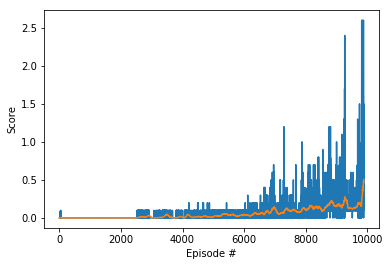

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(avg_scores_window)), avg_scores_window)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [10]:
env.close()